In [2]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
import re
import numpy as np

import time

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.mixture import GaussianMixture

from functions import KNN




# WEBSCRAP


In [2]:
url = 'https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/search?q=Hacendado'

In [3]:
response = requests.get(url)

In [4]:
soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
#soup #Class = 'prominent'

In [6]:
name = soup.find_all(class_ = "prominent")

In [7]:
productos = []
for i in range(len(name)):
    producto = name[i].get_text()
    productos.append(producto)
df = pd.DataFrame({'Producto':productos})

In [8]:
df

,Producto
0,Plátano
1,Macarrones
2,Garbanzos Cocidos
3,Leche Semidesnatada
4,Aguacate
5,Pechuga Fileteada de Pollo
6,Leche Desnatada
7,Atún en Aceite de Oliva
8,Fresa o Freson
9,Aceite de Oliva Virgen Extra


DF
- producto 
- Links para ir iterado
- tamanyo de la porción IMPORTANTE
- Kcal 
- Grasa total 
- grasa saturada (tener cuidado que se puede dividir)
- Carbs
- Azucares (% sobre carbs)
- Proteina
- Sal

In [9]:
link = soup.find_all('href')

In [10]:
'https://www.fatsecret.es/' + name[0].get('href')

'https://www.fatsecret.es//calor%C3%ADas-nutrici%C3%B3n/hacendado/pl%C3%A1tano/1-pieza'

In [11]:
links = []
for i in range(len(name)):
    link = 'https://www.fatsecret.es/' + name[i].get('href')
    links.append(link)


In [12]:
links

['https://www.fatsecret.es//calor%C3%ADas-nutrici%C3%B3n/hacendado/pl%C3%A1tano/1-pieza',
 'https://www.fatsecret.es//calor%C3%ADas-nutrici%C3%B3n/hacendado/macarrones/100g',
 'https://www.fatsecret.es//calor%C3%ADas-nutrici%C3%B3n/hacendado/garbanzos-cocidos/100g',
 'https://www.fatsecret.es//calor%C3%ADas-nutrici%C3%B3n/hacendado/leche-semidesnatada/1-vaso',
 'https://www.fatsecret.es//calor%C3%ADas-nutrici%C3%B3n/hacendado/aguacate/100g',
 'https://www.fatsecret.es//calor%C3%ADas-nutrici%C3%B3n/hacendado/pechuga-fileteada-de-pollo/100g',
 'https://www.fatsecret.es//calor%C3%ADas-nutrici%C3%B3n/hacendado/leche-desnatada/1-vaso',
 'https://www.fatsecret.es//calor%C3%ADas-nutrici%C3%B3n/hacendado/at%C3%BAn-en-aceite-de-oliva/1-lata',
 'https://www.fatsecret.es//calor%C3%ADas-nutrici%C3%B3n/hacendado/fresa-o-freson/100g',
 'https://www.fatsecret.es//calor%C3%ADas-nutrici%C3%B3n/hacendado/aceite-de-oliva-virgen-extra/100ml']

In [13]:
response_2 = requests.get(links[0])

In [14]:
response_2

<Response [200]>

In [15]:
soup2 = BeautifulSoup(response_2.content, 'html.parser')

In [16]:
porcion = soup2.find_all(class_="serving_size black serving_size_value")

In [17]:
porcion[0].get_text()


'1 pieza (130 g)'

In [18]:
tabla = soup2.find_all(class_ = "nutrition_facts eu")

In [19]:
tabla[0].find_all(class_ = 'nutrient black left w1')[0]

#for i in range(len(tabla[0])):
#    print(tabla[0])

<div class="nutrient black left w1">Energía</div>

In [20]:
tabla[0].find_all(class_ = 'nutrient black left tRight w2')


[<div class="nutrient black left tRight w2">533 kj</div>,
 <div class="nutrient black left tRight w2">0,39g</div>,
 <div class="nutrient black left tRight w2">-</div>,
 <div class="nutrient black left tRight w2">29,64g</div>,
 <div class="nutrient black left tRight w2">14,00g</div>,
 <div class="nutrient black left tRight w2">1,43g</div>,
 <div class="nutrient black left tRight w2">-</div>]

In [21]:
data = []
macro = tabla[0].find_all(class_ = 'nutrient black left w1')
valor = tabla[0].find_all(class_ = 'nutrient black left tRight w2')

for i, j in zip(macro, valor):
    macro_name = i.text
    valor_name = j.text
    data.append(f"{macro_name}: {valor_name}")

In [22]:
data

['Energía: 533 kj',
 ': 0,39g',
 'Grasa: -',
 'Carbohidratos: 29,64g',
 'Proteína: 14,00g',
 'Sal: 1,43g']

In [23]:
tabla[0]

<div class="nutrition_facts eu">
<div class="heading black">Info. Nutricional</div>
<div class="divider thin"></div>
<div class="serving_size black serving_size_label">Tamaño de la Porción</div>
<div class="serving_size black serving_size_value">1 pieza (130 g)</div>
<div class="divider thick"></div>
<div class="nutrient header black per_serve left tRight w1p2">por porción</div>
<div class="nutrient header black right tRight w3">% IR*</div>
<div class="divider medium"></div>
<div class="nutrient black left w1">Energía</div>
<div class="nutrient black left tRight w2">533 kj</div>
<div class="nutrient black right tRight w3">6%</div>
<div style="clear:both"></div>
<div class="nutrient black left w1"></div>
<div class="nutrient left tRight w2">127 kcal</div>
<div class="nutrient black right tRight w3"></div>
<div class="divider thin"></div>
<div class="nutrient black left w1">Grasa</div>
<div class="nutrient black left tRight w2">0,39g</div>
<div class="nutrient black right tRight w3">1%</

In [24]:
#Obtener info calorías.

tabla[0].find_all(class_ = 'nutrient black left w1')[0] #Siempre es energia
tabla[0].find_all(class_ = 'nutrient left tRight w2')[0] #Siempre son Kcal



<div class="nutrient left tRight w2">127 kcal</div>

In [25]:
tabla[0].find_all(class_ = 'nutrient black left w1')[2:]


[<div class="nutrient black left w1">Grasa</div>,
 <div class="nutrient black left w1">Carbohidratos</div>,
 <div class="nutrient black left w1">Proteína</div>,
 <div class="nutrient black left w1">Sal</div>]

In [26]:
def getinfo(supermercado, max_range = 481):
    import requests
    from bs4 import BeautifulSoup
    from urllib.parse import urljoin
    import pandas as pd
    import re
    import numpy as np
    import time
    global data
    
    scraperapi_key = '71e950d37f6e7fc97008cb8f39293837'
    
    productos = []
    porcion = []
    kcal = []
    grasa = []
    saturadas = []
    carbs = []
    azucares = []
    sal = []
    prote = []
        
    for page in range(max_range):

        url1 = f'https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/search?q={supermercado}&pg={page}'
        url_ = f'http://api.scraperapi.com?api_key={scraperapi_key}&url={url1}'
        response = requests.get(url_)
        print(f'Searching in {url_}, {response}')
        soup = BeautifulSoup(response.content, 'html.parser')

        #Get productos
        name = soup.find_all(class_ = "prominent")
            
        for i in range(len(name)):
            producto = name[i].get_text()
            productos.append(producto)
            
            
        #get links
        links = []
        for i in range(len(name)):
            link = 'https://www.fatsecret.es/' + name[i].get('href')
            links.append(link)
        time.sleep(4)
        for linkaso in links:
            url_product = linkaso
            response_macro = requests.get(url_product)
            print(f'Searching in {url_product}, {response_macro}')
            print(response_macro)
            soup_macro = BeautifulSoup(response_macro.content, 'html.parser')

            #get porciones
            porcion_get = soup_macro.find_all(class_="serving_size black serving_size_value")
            porcion.append(porcion_get)

            tabla = soup_macro.find_all(class_ = "nutrition_facts eu")

            #get Kcal
            kcal_get = tabla[0].find_all(class_ = 'nutrient left tRight w2')[0] #Siempre son Kcal
            kcal.append(kcal_get)

            #get Macros
            get_grasa = tabla[0].find_all(class_ = 'nutrient black left tRight w2')[1]
            get_saturada = tabla[0].find_all(class_ = 'nutrient black left tRight w2')[2]
            get_carbs = tabla[0].find_all(class_ = 'nutrient black left tRight w2')[3]
            get_azucar = tabla[0].find_all(class_ = 'nutrient black left tRight w2')[4]
            get_prot = tabla[0].find_all(class_ = 'nutrient black left tRight w2')[5]
            get_sal = tabla[0].find_all(class_ = 'nutrient black left tRight w2')[6]

            grasa.append(get_grasa)
            saturadas.append(get_saturada)
            carbs.append(get_carbs)
            azucares.append(get_azucar)
            prote.append(get_prot)
            sal.append(get_sal)
        time.sleep(2)
    data = pd.DataFrame({'Producto': productos, 
                         'Porcion':porcion, 
                         'Kcal':kcal, 
                         'Grasa':grasa, 
                         'Grasas saturadas':saturadas, 
                         'Carbohidratos':carbs, 
                         'Azucares':azucares,
                         'Proteina': prote,
                         'sal':sal })

    print(data)







In [27]:
getinfo('Hacendado')

Searching in http://api.scraperapi.com?api_key=71e950d37f6e7fc97008cb8f39293837&url=https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/search?q=Hacendado&pg=0, <Response [403]>


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1380\2531175093.py:29: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(response.content, 'html.parser')


Searching in http://api.scraperapi.com?api_key=71e950d37f6e7fc97008cb8f39293837&url=https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/search?q=Hacendado&pg=1, <Response [403]>
Searching in http://api.scraperapi.com?api_key=71e950d37f6e7fc97008cb8f39293837&url=https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/search?q=Hacendado&pg=2, <Response [403]>
Searching in http://api.scraperapi.com?api_key=71e950d37f6e7fc97008cb8f39293837&url=https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/search?q=Hacendado&pg=3, <Response [403]>
Searching in http://api.scraperapi.com?api_key=71e950d37f6e7fc97008cb8f39293837&url=https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/search?q=Hacendado&pg=4, <Response [403]>
Searching in http://api.scraperapi.com?api_key=71e950d37f6e7fc97008cb8f39293837&url=https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/search?q=Hacendado&pg=5, <Response [403]>
Searching in http://api.scraperapi.com?api_key=71e950d37f6e7fc97008cb8f39293837&url=https://www.fats

KeyboardInterrupt: 

In [ ]:
data

NameError: name 'data' is not defined

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

def getinfo(supermercado, max_range=481):
    # Tu clave de ScraperAPI
    scraperapi_key = 'a776dd8ebc5c519a3782f1ee0ff79bd2'

    productos = []
    porcion = []
    kcal = []
    grasa = []
    saturadas = []
    carbs = []
    azucares = []
    sal = []
    prote = []

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    for page in range(11, max_range):
        url1 = f'https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/search?q={supermercado}&pg={page}'
        url_ = f'http://api.scraperapi.com?api_key={scraperapi_key}&url={url1}'

        try:
            response = requests.get(url_, headers=headers)
            print(f'Searching in {url_}, {response}')
            if response.status_code != 200:
                print(f"Failed to retrieve page {page}")
                continue

            soup = BeautifulSoup(response.content, 'html.parser')

            # Get productos
            name = soup.find_all(class_="prominent")
            for i in range(len(name)):
                producto = name[i].get_text()
                productos.append(producto)

            # Get links
            links = ['https://www.fatsecret.es' + name[i].get('href') for i in range(len(name))]

            for linkaso in links:
                try:
                    url_product = f'http://api.scraperapi.com?api_key={scraperapi_key}&url={linkaso}'
                    response_macro = requests.get(url_product, headers=headers)
                    print(f'Searching in {url_product}, {response_macro}')
                    if response_macro.status_code != 200:
                        print(f"Failed to retrieve {linkaso}")
                        continue

                    soup_macro = BeautifulSoup(response_macro.content, 'html.parser')

                    # Get porciones
                    porcion_get = soup_macro.find(class_="serving_size black serving_size_value").get_text()
                    porcion.append(porcion_get)

                    tabla = soup_macro.find(class_="nutrition_facts eu")

                    # Get Kcal
                    kcal_get = tabla.find_all(class_='nutrient left tRight w2')[0].get_text()  # Siempre son Kcal
                    kcal.append(kcal_get)

                    # Get Macros
                    macros = tabla.find_all(class_='nutrient black left tRight w2')
                    grasa.append(macros[1].get_text())
                    saturadas.append(macros[2].get_text())
                    carbs.append(macros[3].get_text())
                    azucares.append(macros[4].get_text())
                    prote.append(macros[5].get_text())
                    sal.append(macros[6].get_text())

                except Exception as e:
                    print(f"Error retrieving macro data for {linkaso}: {e}")
                time.sleep(2)  # Espera entre solicitudes a los productos
        except Exception as e:
            print(f"Error retrieving page {page}: {e}")
        time.sleep(4)  # Espera entre solicitudes de páginas de búsqueda

    data = pd.DataFrame({
        'Producto': productos,
        'Porcion': porcion,
        'Kcal': kcal,
        'Grasa': grasa,
        'Grasas saturadas': saturadas,
        'Carbohidratos': carbs,
        'Azucares': azucares,
        'Proteina': prote,
        'Sal': sal
    })

    
    data.to_csv('Dataset/Scrapeada.csv', index=False)
    return data

# Llamada a la función
data = getinfo('hacendado', max_range=441)  # Puedes ajustar 'max_range' según sea necesario

Searching in http://api.scraperapi.com?api_key=71e950d37f6e7fc97008cb8f39293837&url=https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/search?q=hacendado&pg=11, <Response [200]>
Searching in http://api.scraperapi.com?api_key=71e950d37f6e7fc97008cb8f39293837&url=https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/hacendado/salteado-de-verduras-asadas/100g, <Response [200]>
Searching in http://api.scraperapi.com?api_key=71e950d37f6e7fc97008cb8f39293837&url=https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/hacendado/claras-de-huevo/100ml, <Response [200]>
Searching in http://api.scraperapi.com?api_key=71e950d37f6e7fc97008cb8f39293837&url=https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/hacendado/tortilla-de-avena-51/1-porci%C3%B3n, <Response [200]>
Searching in http://api.scraperapi.com?api_key=71e950d37f6e7fc97008cb8f39293837&url=https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/hacendado/queso-mozzarella/100g, <Response [200]>
Searching in http://api.scraperapi.com?api

ValueError: All arrays must be of the same length

In [ ]:
productos

NameError: name 'productos' is not defined

In [ ]:
data.to_csv('Dataset/10primeraspaginas.csv', index=False)


In [ ]:
for i in range(9,20):
    print(i)

9
10
11
12
13
14
15
16
17
18
19


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

def getinfo(supermercado, max_range=481):
    # Tu clave de ScraperAPI
    scraperapi_key = 'eef30e08a8a4e0d35c6970a43538b573'

    productos = []
    porcion = []
    kcal = []
    grasa = []
    saturadas = []
    carbs = []
    azucares = []
    sal = []
    prote = []

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    for page in range(451, max_range):
        url1 = f'https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/search?q={supermercado}&pg={page}'
        url_ = f'http://api.scraperapi.com?api_key={scraperapi_key}&url={url1}'

        try:
            response = requests.get(url_, headers=headers)
            print(f'Searching in {url_}, {response}')
            if response.status_code != 200:
                print(f"Failed to retrieve page {page}")
                continue

            soup = BeautifulSoup(response.content, 'html.parser')

            # Get productos
            name = soup.find_all(class_="prominent")
            for i in range(len(name)):
                producto = name[i].get_text()
                productos.append(producto)

            # Get links
            links = ['https://www.fatsecret.es' + name[i].get('href') for i in range(len(name))]

            for linkaso in links:
                try:
                    url_product = f'http://api.scraperapi.com?api_key={scraperapi_key}&url={linkaso}'
                    response_macro = requests.get(url_product, headers=headers)
                    print(f'Searching in {url_product}, {response_macro}')
                    if response_macro.status_code != 200:
                        print(f"Failed to retrieve {linkaso}")
                        continue

                    soup_macro = BeautifulSoup(response_macro.content, 'html.parser')

                    # Get porciones
                    porcion_get = soup_macro.find(class_="serving_size black serving_size_value").get_text()
                    porcion.append(porcion_get)

                    tabla = soup_macro.find(class_="nutrition_facts eu")

                    # Get Kcal
                    kcal_get = tabla.find_all(class_='nutrient left tRight w2')[0].get_text()  # Siempre son Kcal
                    kcal.append(kcal_get)

                    # Get Macros
                    macros = tabla.find_all(class_='nutrient black left tRight w2')
                    grasa.append(macros[1].get_text())
                    saturadas.append(macros[2].get_text())
                    carbs.append(macros[3].get_text())
                    azucares.append(macros[4].get_text())
                    prote.append(macros[5].get_text())
                    sal.append(macros[6].get_text())

                except Exception as e:
                    print(f"Error retrieving macro data for {linkaso}: {e}")
                    # Añadir None para mantener las listas con la misma longitud en caso de error
                    porcion.append(None)
                    kcal.append(None)
                    grasa.append(None)
                    saturadas.append(None)
                    carbs.append(None)
                    azucares.append(None)
                    prote.append(None)
                    sal.append(None)
                time.sleep(2)  # Espera entre solicitudes a los productos
        except Exception as e:
            print(f"Error retrieving page {page}: {e}")
        time.sleep(4)  # Espera entre solicitudes de páginas de búsqueda

    # Asegurarse de que todas las listas tienen la misma longitud
    max_len = max(len(productos), len(porcion), len(kcal), len(grasa), len(saturadas), len(carbs), len(azucares), len(prote), len(sal))
    
    def pad_list(lst, max_len):
        return lst + [None] * (max_len - len(lst))

    productos = pad_list(productos, max_len)
    porcion = pad_list(porcion, max_len)
    kcal = pad_list(kcal, max_len)
    grasa = pad_list(grasa, max_len)
    saturadas = pad_list(saturadas, max_len)
    carbs = pad_list(carbs, max_len)
    azucares = pad_list(azucares, max_len)
    prote = pad_list(prote, max_len)
    sal = pad_list(sal, max_len)

    data = pd.DataFrame({
        'Producto': productos,
        'Porcion': porcion,
        'Kcal': kcal,
        'Grasa': grasa,
        'Grasas saturadas': saturadas,
        'Carbohidratos': carbs,
        'Azucares': azucares,
        'Proteina': prote,
        'Sal': sal
    })

    data.to_csv('Dataset/Merca_last.csv', index=False)
    return data

# Llamada a la función
data = getinfo('hacendado', max_range=480)  # Puedes ajustar 'max_range' según sea necesario

Searching in http://api.scraperapi.com?api_key=eef30e08a8a4e0d35c6970a43538b573&url=https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/search?q=hacendado&pg=451, <Response [200]>
Searching in http://api.scraperapi.com?api_key=eef30e08a8a4e0d35c6970a43538b573&url=https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/hacendado/duo-ligero-mousse-con-salsa-de-chocolate/100g, <Response [200]>
Searching in http://api.scraperapi.com?api_key=eef30e08a8a4e0d35c6970a43538b573&url=https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/hacendado/patatas-miel-y-mostaza/100g, <Response [200]>
Searching in http://api.scraperapi.com?api_key=eef30e08a8a4e0d35c6970a43538b573&url=https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/hacendado/mini-pan-cebolla/100g, <Response [200]>
Searching in http://api.scraperapi.com?api_key=eef30e08a8a4e0d35c6970a43538b573&url=https://www.fatsecret.es/calor%C3%ADas-nutrici%C3%B3n/hacendado/copos-de-trigo-integral-con-frutas/100g, <Response [200]>
Searching in http:

In [ ]:
data

,Producto,Porcion,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Sal
0,Duo Ligero Mousse con Salsa de Chocolate,100 g,117 kcal,"2,80g","1,700g","18,40g","16,80g","4,40g","0,32g"
1,Patatas Miel y Mostaza,100 g,563 kcal,"37,00g","3,100g","50,60g","2,30g","5,60g","0,00g"
2,Mini Pan Cebolla,100 g,524 kcal,"29,60g","3,100g","55,60g","2,40g","8,10g","0,00g"
3,Copos de Trigo Integral con Frutas,100 g,370 kcal,"7,50g","4,000g","59,00g","23,00g","11,00g","0,00g"
4,Bebida de Chufa sin Lactosa,100 ml,38 kcal,"2,50g","0,800g","3,40g","2,20g","0,60g","0,25g"
...,...,...,...,...,...,...,...,...,...
285,Queso Añejo Aceite de Oliva Leche Cruda,100 g,466 kcal,"39,00g","24,000g","2,50g","1,50g","24,00g","2,00g"
286,Pan Semillas y Pipas,100 g,291 kcal,"9,30g","1,500g","38,00g","5,30g","11,00g","1,10g"
287,Jamón Serrano Reserva,None,None,None,None,None,None,None,None
288,Choco Galleta-Biscoito,None,None,None,None,None,None,None,None


In [ ]:
data

,Producto,Porcion,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Sal
0,Atún Claro al Natural,1 lata (60 g),60 kcal,"0,50g","0,200g","0,00g",-,"13,80g","0,72g"
1,Rodajas de Piña en Su Jugo,2 rodajas (66 g),35 kcal,"0,00g","0,000g","8,20g","6,00g","0,30g","0,00g"
2,Napolitanas Rellenas de Cacao,1 unidade (40 g),174 kcal,"9,60g","4,800g","18,80g","7,60g","2,20g","0,50g"
3,Queso Fundido en Lonchas,"1 loncha (18,75 g)",40 kcal,"3,80g","2,700g","1,10g","1,10g","2,40g","2,30g"
4,Lentejas con Chorizo,100 g,139 kcal,"8,50g","2,100g","9,30g","0,60g","5,10g","0,81g"
...,...,...,...,...,...,...,...,...,...
1367,Empanada de Pollo,100 g,193 kcal,"5,40g","0,800g","28,00g","1,50g","7,70g","1,20g"
1368,Tortitas De Arroz Integral Con Chocolate Blanco,100 g,481 kcal,"18,00g","11,000g","70,00g","28,00g","7,10g","0,13g"
1369,Té Rooibos Sabor a Fresa Bajo en Calorias,100 ml,19 kcal,"0,00g","0,000g","4,50g","4,50g","0,00g","0,00g"
1370,Té Rooibos Sabor a Fresa Bajo en Calorias,100 ml,19 kcal,"0,00g","0,000g","4,50g","4,50g","0,00g","0,00g"


In [ ]:
data = pd.read_csv('Dataset/Scrap_Mercadona.csv')

In [ ]:
data

,Producto,Porcion,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Sal
0,Banana,100 g,89 kcal,"0,30g","0,100g","23,00g","12,00g","1,10g","0,00g"
1,Salmón,100 g,224 kcal,"16,00g","2,700g","0,00g",-,"20,00g",-
2,Yogur +Proteínas con Trozos de Fresa,1 tarro (120 g),64 kcal,"0,10g",-,"6,00g","5,50g","10,00g","0,12g"
3,Quesitos Light,"1 quesito (15,625 g)",23 kcal,"1,40g","0,900g","0,90g","0,90g","1,80g","0,30g"
4,Langostino Cocido,100 g,98 kcal,"1,10g","0,300g","0,50g","0,50g","22,20g","1,75g"
...,...,...,...,...,...,...,...,...,...
4345,Calendario de Adviento,100 g,544 kcal,"32,00g","20,000g","55,00g","54,00g","7,50g","0,18g"
4346,Quinoa con Leche,100 g,114 kcal,"2,20g","1,200g","20,60g","15,00g","2,70g","0,00g"
4347,Mousse Soja Chocolate,1 vaso (50 g),89 kcal,"4,80g","3,300g","9,30g","8,90g","1,70g","0,00g"
4348,Ensalada Completa Quinoa,100 g,154 kcal,"7,40g","1,100g","16,00g","5,10g","4,50g","0,00g"


In [ ]:
mask = data.isnull().any(axis=1)

In [ ]:
data[mask]

,Producto,Porcion,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Sal
434,Bebida +Proteínas Sabor Coco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,Atún en Aceite de Oliva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,Patatas Chips,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,Costillas de Cerdo Asadas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,Pan de Molde sin Gluten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439,Hélices Vegetales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,Café Soluble Descafeinado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1666,Chocolate Extrafino Negro 85% Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2506,Barquillos Artesanos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2910,Ternera al Ajillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:

productos = ['Bebida +Proteínas Sabor Coco', 'Atún en Aceite de Oliva', 'Patatas Chips',
    'Costillas de Cerdo Asadas', 'Pan de Molde sin Gluten', 'Hélices Vegetales',
    'Café Soluble Descafeinado', 'Chocolate Extrafino Negro 85% Cacao',
    'Barquillos Artesanos', 'Ternera al Ajillo', 'Yogur para Beber 0 Fresa']
porcion = ['100g', '60g', '100g', '100g', '100g', '100g', '2g', '20g', '100g', '100g', '100g']
kcal = ['48', '147', '506', '257', '282', '358', '5', '115', '401', '98', '31']
grasa = ['0.4', '10.8', '27.2', '15', '11', '1.5', '0', '9.2', '6.3', '2', '0.1']
grasa_saturada = ['0.2', '1.740', '3.9', '5.8', '1.3', '0.3', '0', '5.6', '1.9', '0.8', '0']
carbs = ['3.8', '0.54', '58', '16', '40', '72', '0.76', '4.3', '79', '1.5', '4.2']
azucar = ['3.5', '0.30', '1.6', '12', '3.8', '3.1', '0', '3.0', '39', '0.5', '4.1']
prote = ['7.2', '12.6', '7.3', '14', '1', '12', '0.34', '2.4', '7', '19', '3.2']
sal = ['0.12', '0', '0.01', '1.2', '1.3', '0.03', '0', '0', '0', '1.3', '0']
productos_fallo = pd.DataFrame({
    'Producto': productos,
    'Porcion': porcion,
    'Kcal': kcal,
    'Grasa': grasa,
    'Grasas saturadas': grasa_saturada,
    'Carbohidratos': carbs,
    'Azucares': azucar,
    'Proteina': prote,
    'Sal': sal
})

In [17]:
#falta fer lo mateix pero de min 450  -   max 481 per hacendado
productos = ['Jamon serrano reserva','Choco Galleta-Biscoito','Frito Mallorquin']
porcion = ['100g','100g','100g']
kcal = ['248','501','122']
grasa = ['12.2','25','3.9']
grasa_saturada = ['4.6','14','1.9']
carbs = ['1','64','2.7']
azucar = ['0.5','45','0.9']
prote = ['33.5','5.1','18.9']
sal = ['3.6','0.44','0.37']

productos_fallodos = pd.DataFrame({
    'Producto': productos,
    'Porcion': porcion,
    'Kcal': kcal,
    'Grasa': grasa,
    'Grasas saturadas': grasa_saturada,
    'Carbohidratos': carbs,
    'Azucares': azucar,
    'Proteina': prote,
    'Sal': sal
})


# DataFrame

In [154]:
primeras = pd.read_csv('Dataset/10primeraspaginas.csv')
oncedoce = pd.read_csv('Dataset/la 11 y la 12.csv')
DataMerca = pd.read_csv('Dataset/Scrap_Mercadona.csv')
last = pd.read_csv('Dataset/Merca_last.csv')
DataCrf = pd.read_csv('Dataset/Scrap_CRF.csv')
DataDia = pd.read_csv('Dataset/Scrap_DIA.csv')
DataLidl = pd.read_csv('Dataset/Scrap_LILD.csv')
productos_fallo
productos_fallodos

,Producto,Porcion,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Sal
0,Jamon serrano reserva,100g,248,12.2,4.6,1,0.5,33.5,3.6
1,Choco Galleta-Biscoito,100g,501,25,14,64,45,5.1,0.44
2,Frito Mallorquin,100g,122,3.9,1.9,2.7,0.9,18.9,0.37


In [155]:
mercadona = pd.concat([primeras, oncedoce, DataMerca,last,productos_fallo, productos_fallodos])

In [156]:
mercadona

,Producto,Porcion,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Sal
0,Plátano,1 pieza (130 g),127 kcal,"0,39g",-,"29,64g","14,00g","1,43g",-
1,Macarrones,100 g,361 kcal,"1,50g","0,400g","72,00g","3,50g","13,00g","0,01g"
2,Garbanzos Cocidos,100 g,90 kcal,"2,20g","0,500g","9,50g","0,70g","5,50g","2,00g"
3,Leche Semidesnatada,1 taza (250 ml),115 kcal,"4,00g","2,800g","12,00g","12,00g","7,80g","0,13g"
4,Aguacate,100 g,160 kcal,"15,00g","2,100g","8,50g","0,70g","2,00g",-
...,...,...,...,...,...,...,...,...,...
9,Ternera al Ajillo,100g,98,2,0.8,1.5,0.5,19,1.3
10,Yogur para Beber 0 Fresa,100g,31,0.1,0,4.2,4.1,3.2,0
0,Jamon serrano reserva,100g,248,12.2,4.6,1,0.5,33.5,3.6
1,Choco Galleta-Biscoito,100g,501,25,14,64,45,5.1,0.44


In [157]:
mercadona.reset_index(inplace = True, drop = True)

In [158]:
mercadona['Supermercado'] = 'mercadona'
DataLidl['Supermercado'] = 'lidl'
DataDia['Supermercado'] = 'dia'
DataCrf['Supermercado'] = 'carrefour'

In [159]:
data = pd.concat([mercadona, DataCrf, DataDia, DataLidl])

In [160]:
data.reset_index(inplace = True, drop = True)

In [161]:
data.dropna(inplace = True)

In [162]:
cols = list(data.columns)

In [163]:
cols
for i in cols[1:-1]:
    print(i)
    data[i] = data[i].str.replace('g', '')
    data[i] = data[i].str.replace('kcal','')
    data[i] = data[i].str.replace(',','.')
    data[i] = data[i].str.replace('-','0')
    data[i] = data[i].str.replace(' ','')
    data[i] = data[i].str.replace('ml','')
    

Porcion
Kcal
Grasa
Grasas saturadas
Carbohidratos
Azucares
Proteina
Sal


In [164]:
porcion_num = []
for i in data['Porcion']:
    
    parentesis = re.search('\(([\d\.]+)\)$',i)
    if parentesis:
        porcion_num.append(parentesis.group(1))
    else:
        porcion_num.append(i)

data['Porcion_num'] = porcion_num


In [165]:
data['Porcion'] = data['Porcion_num']
data.drop(columns = 'Porcion_num', inplace = True)

In [166]:
data

,Producto,Porcion,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Sal,Supermercado
0,Plátano,130,127,0.39,0,29.64,14.00,1.43,0,mercadona
1,Macarrones,100,361,1.50,0.400,72.00,3.50,13.00,0.01,mercadona
2,Garbanzos Cocidos,100,90,2.20,0.500,9.50,0.70,5.50,2.00,mercadona
3,Leche Semidesnatada,250,115,4.00,2.800,12.00,12.00,7.80,0.13,mercadona
4,Aguacate,100,160,15.00,2.100,8.50,0.70,2.00,0,mercadona
...,...,...,...,...,...,...,...,...,...,...
9029,Cherry Peppers With Hummus And Black Olives,100,188,12.80,1.900,12.20,8.30,4.00,0.95,lidl
9030,Crunchy Chicken,100,249,13.30,0,21.00,0,10.90,0,lidl
9031,Arroz de Brócoli,100,34,0.50,0,3.50,1.50,2.40,0.01,lidl
9032,Anillas a la Romana,100,219,7.80,1.700,29.80,0.70,6.40,1.33,lidl


In [82]:
for i in cols[1:-1]:
    data[i] = data[i].astype(float)


ValueError: could not convert string to float: '4tortitas'

In [93]:
masca = data['Porcion'] == '1helado'
res = data[masca]
res

,Producto,Porcion,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Sal,Supermercado
1924,Helado Mini Bombón Negro,1helado,121,8.10,5.300,12.90,2.00,2.50,0.15,mercadona
7940,Cono Nata,1helado,176,9.00,7.600,21.10,14.50,2.40,0.00,dia


In [174]:
ture = []
for i in data['Porcion']:
    
    letras = re.search('\d\D\D',i)
    if letras:
        ture.append(True)
    else:
        ture.append(False)

data['Porcion_check'] = ture

In [175]:
masca = data['Porcion_check'] == True
res = data[masca]
res

,Producto,Porcion,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Sal,Supermercado,Porcion_check


In [169]:
res['Porcion'].value_counts()

Porcion
1helado               2
1porción              1
4unidades             1
1paquete(4alletas)    1
1unidad               1
2alletas              1
5alletas              1
1barrita              1
100oz                 1
Name: count, dtype: int64

In [172]:
cols
for i in cols[1:-1]:
    print(i)
    data[i] = data[i].str.replace('1helado', '70')
    data[i] = data[i].str.replace('1porción','100')
    data[i] = data[i].str.replace('4unidades','100')
    data[i] = data[i].str.replace('1paquete(4alletas)','44')
    data[i] = data[i].str.replace('1unidad','100')
    data[i] = data[i].str.replace('2alletas','35')
    data[i] = data[i].str.replace('5alletas','55')
    data[i] = data[i].str.replace('1barrita','25')
    data[i] = data[i].str.replace('100oz','100')

Porcion
Kcal
Grasa
Grasas saturadas
Carbohidratos
Azucares
Proteina
Sal


In [177]:
data.drop(columns='Porcion_check', inplace = True)

In [178]:
data

,Producto,Porcion,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Sal,Supermercado
0,Plátano,130,127,0.39,0,29.64,14.00,1.43,0,mercadona
1,Macarrones,100,361,1.50,0.400,72.00,3.50,13.00,0.01,mercadona
2,Garbanzos Cocidos,100,90,2.20,0.500,9.50,0.70,5.50,2.00,mercadona
3,Leche Semidesnatada,250,115,4.00,2.800,12.00,12.00,7.80,0.13,mercadona
4,Aguacate,100,160,15.00,2.100,8.50,0.70,2.00,0,mercadona
...,...,...,...,...,...,...,...,...,...,...
9029,Cherry Peppers With Hummus And Black Olives,100,188,12.80,1.900,12.20,8.30,4.00,0.95,lidl
9030,Crunchy Chicken,100,249,13.30,0,21.00,0,10.90,0,lidl
9031,Arroz de Brócoli,100,34,0.50,0,3.50,1.50,2.40,0.01,lidl
9032,Anillas a la Romana,100,219,7.80,1.700,29.80,0.70,6.40,1.33,lidl


In [179]:
for i in cols[1:-1]:
    data[i] = data[i].astype(float)

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9020 entries, 0 to 9033
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Producto          9020 non-null   object 
 1   Porcion           9020 non-null   float64
 2   Kcal              9020 non-null   float64
 3   Grasa             9020 non-null   float64
 4   Grasas saturadas  9020 non-null   float64
 5   Carbohidratos     9020 non-null   float64
 6   Azucares          9020 non-null   float64
 7   Proteina          9020 non-null   float64
 8   Sal               9020 non-null   float64
 9   Supermercado      9020 non-null   object 
dtypes: float64(8), object(2)
memory usage: 775.2+ KB


In [190]:
cols = list(data.columns)[2:-1]

In [201]:
for i in cols:
    data[i] = data[i]/data['Porcion']*100
data.drop(columns='Porcion', inplace = True)

In [203]:
data

,Producto,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Sal,Supermercado
0,Plátano,97.692308,0.3,0.00,22.8,10.769231,1.10,0.000,mercadona
1,Macarrones,361.000000,1.5,0.40,72.0,3.500000,13.00,0.010,mercadona
2,Garbanzos Cocidos,90.000000,2.2,0.50,9.5,0.700000,5.50,2.000,mercadona
3,Leche Semidesnatada,46.000000,1.6,1.12,4.8,4.800000,3.12,0.052,mercadona
4,Aguacate,160.000000,15.0,2.10,8.5,0.700000,2.00,0.000,mercadona
...,...,...,...,...,...,...,...,...,...
9015,Cherry Peppers With Hummus And Black Olives,188.000000,12.8,1.90,12.2,8.300000,4.00,0.950,lidl
9016,Crunchy Chicken,249.000000,13.3,0.00,21.0,0.000000,10.90,0.000,lidl
9017,Arroz de Brócoli,34.000000,0.5,0.00,3.5,1.500000,2.40,0.010,lidl
9018,Anillas a la Romana,219.000000,7.8,1.70,29.8,0.700000,6.40,1.330,lidl


In [198]:
data2

,Producto,Porcion,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Sal,Supermercado
0,Plátano,130.0,127.0,0.39,0.0,29.64,14.0,1.43,0.00,mercadona
1,Macarrones,100.0,361.0,1.50,0.4,72.00,3.5,13.00,0.01,mercadona
2,Garbanzos Cocidos,100.0,90.0,2.20,0.5,9.50,0.7,5.50,2.00,mercadona
3,Leche Semidesnatada,250.0,115.0,4.00,2.8,12.00,12.0,7.80,0.13,mercadona
4,Aguacate,100.0,160.0,15.00,2.1,8.50,0.7,2.00,0.00,mercadona
...,...,...,...,...,...,...,...,...,...,...
9015,Cherry Peppers With Hummus And Black Olives,100.0,188.0,12.80,1.9,12.20,8.3,4.00,0.95,lidl
9016,Crunchy Chicken,100.0,249.0,13.30,0.0,21.00,0.0,10.90,0.00,lidl
9017,Arroz de Brócoli,100.0,34.0,0.50,0.0,3.50,1.5,2.40,0.01,lidl
9018,Anillas a la Romana,100.0,219.0,7.80,1.7,29.80,0.7,6.40,1.33,lidl


In [290]:
#Transformar Grasas saturadas y Azucares en % sobre el total
data['Saturada%'] = data['Grasas saturadas']/data['Grasa']*100
data['Azucares%'] = data['Azucares']/data['Carbohidratos']*100
#Tirar un VIF & una Matriz de correlación



In [291]:
data

,Producto,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Sal,Supermercado,Cluster_Kmeans,Saturada%,Azucares%
0,Plátano,97.692308,0.3,0.00,22.8,10.769231,1.10,0.000,mercadona,2,0.000000,47.233468
1,Macarrones,361.000000,1.5,0.40,72.0,3.500000,13.00,0.010,mercadona,6,26.666667,4.861111
2,Garbanzos Cocidos,90.000000,2.2,0.50,9.5,0.700000,5.50,2.000,mercadona,2,22.727273,7.368421
3,Leche Semidesnatada,46.000000,1.6,1.12,4.8,4.800000,3.12,0.052,mercadona,2,70.000000,100.000000
4,Aguacate,160.000000,15.0,2.10,8.5,0.700000,2.00,0.000,mercadona,2,14.000000,8.235294
...,...,...,...,...,...,...,...,...,...,...,...,...
9015,Cherry Peppers With Hummus And Black Olives,188.000000,12.8,1.90,12.2,8.300000,4.00,0.950,lidl,2,14.843750,68.032787
9016,Crunchy Chicken,249.000000,13.3,0.00,21.0,0.000000,10.90,0.000,lidl,1,0.000000,0.000000
9017,Arroz de Brócoli,34.000000,0.5,0.00,3.5,1.500000,2.40,0.010,lidl,2,0.000000,42.857143
9018,Anillas a la Romana,219.000000,7.8,1.70,29.8,0.700000,6.40,1.330,lidl,1,21.794872,2.348993


In [411]:
data.to_csv(f'Dataset/Data_total_porcentajes.csv', index=False)

In [412]:
data

,Producto,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Supermercado,Cluster_Kmeans
0,Plátano,97.692308,0.3,0.00,22.8,10.769231,1.10,mercadona,1
1,Macarrones,361.000000,1.5,0.40,72.0,3.500000,13.00,mercadona,5
2,Garbanzos Cocidos,90.000000,2.2,0.50,9.5,0.700000,5.50,mercadona,1
3,Leche Semidesnatada,46.000000,1.6,1.12,4.8,4.800000,3.12,mercadona,1
4,Aguacate,160.000000,15.0,2.10,8.5,0.700000,2.00,mercadona,3
...,...,...,...,...,...,...,...,...,...
9015,Cherry Peppers With Hummus And Black Olives,188.000000,12.8,1.90,12.2,8.300000,4.00,lidl,3
9016,Crunchy Chicken,249.000000,13.3,0.00,21.0,0.000000,10.90,lidl,3
9017,Arroz de Brócoli,34.000000,0.5,0.00,3.5,1.500000,2.40,lidl,1
9018,Anillas a la Romana,219.000000,7.8,1.70,29.8,0.700000,6.40,lidl,3


In [421]:
dupli = data.duplicated(subset=['Producto','Supermercado'], keep = 'first')
dupli

data_no_dup = data[~dupli]

In [417]:
dat

Producto
Gazpacho Suave                    4
Arroz con Leche                   4
Lomo Embuchado                    4
Arroz Redondo                     4
Queso Havarti                     4
                                 ..
Mini Pan Pasas                    1
Café Clásico Descafeinado         1
Crema para Untar de Jamón York    1
Patata para Tortilla              1
Bebida de Avena Calcio 0%         1
Name: count, Length: 7645, dtype: int64

In [440]:
#VIF & Correlation

In [463]:
df = pd.read_csv('Dataset/Data_total_porcentajes.csv')

In [466]:
data = df.copy()

In [467]:
data

,Producto,Kcal,Grasa,Carbohidratos,Proteina,Sal,Supermercado,Saturada%,Azucares%
0,Plátano,97.692308,0.3,22.8,1.10,0.000,mercadona,0.000000,47.233468
1,Macarrones,361.000000,1.5,72.0,13.00,0.010,mercadona,26.666667,4.861111
2,Garbanzos Cocidos,90.000000,2.2,9.5,5.50,2.000,mercadona,22.727273,7.368421
3,Leche Semidesnatada,46.000000,1.6,4.8,3.12,0.052,mercadona,70.000000,100.000000
4,Aguacate,160.000000,15.0,8.5,2.00,0.000,mercadona,14.000000,8.235294
...,...,...,...,...,...,...,...,...,...
8756,Cherry Peppers With Hummus And Black Olives,188.000000,12.8,12.2,4.00,0.950,lidl,14.843750,68.032787
8757,Crunchy Chicken,249.000000,13.3,21.0,10.90,0.000,lidl,0.000000,0.000000
8758,Arroz de Brócoli,34.000000,0.5,3.5,2.40,0.010,lidl,0.000000,42.857143
8759,Anillas a la Romana,219.000000,7.8,29.8,6.40,1.330,lidl,21.794872,2.348993


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


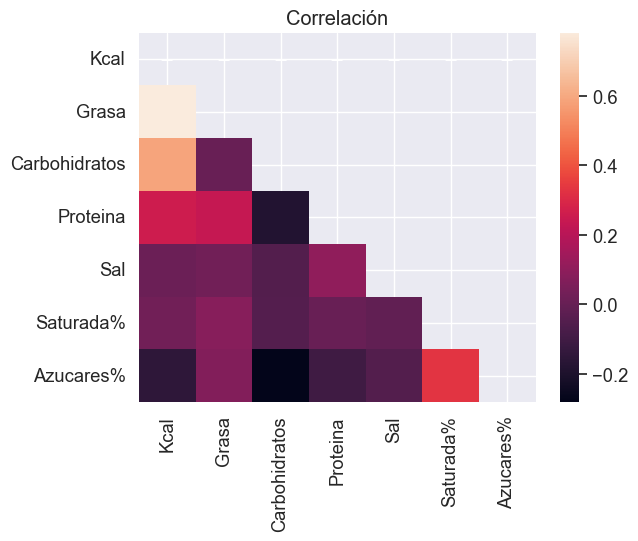

In [469]:
corraus = data.drop(columns = ['Producto', 'Supermercado']).corr()
mask = np.triu(np.ones_like(corraus, dtype=bool))
corr_var = sns.heatmap(corraus,annot=True,mask=mask)
plt.title("Correlación")
plt.show()
#etiquetas = ['', 'Sexo\n (M)', 'Fatal\n(Y)', 'Actividad\n(Deportes de tabla)','País\n(Australia)']
#etiquetas1 = ['Edad\n (25)', 'Sexo', 'Fatal', 'Actividad','']
#corr_var.set_xticklabels(etiquetas1, rotation=0)
#corr_var.set_yticklabels(etiquetas, rotation=0)

# Modelos sin porcentajes y con KCAL


In [431]:
data = pd.read_csv('Dataset/Data_total.csv')
dupli = data.duplicated(subset=['Producto','Supermercado'], keep = 'first')
dupli

data = data[~dupli]


In [433]:
data['Saturada%'] = data['Grasas saturadas']/data['Grasa']*100
data['Azucares%'] = data['Azucares']/data['Carbohidratos']*100

In [435]:
data.drop(columns=['Azucares', 'Grasas saturadas'], inplace = True)

In [462]:
data.to_csv('Dataset/Data_Total_porcentajes.csv', index=False)

In [461]:
data.drop(columns=['Unnamed: 0'],inplace = True)

In [22]:
#Kmins
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [40]:
data_1 = pd.read_csv('Dataset/Data_total.csv')

dupli = data_1.duplicated(subset=['Producto','Supermercado'], keep = 'first')
dupli

data_1 = data_1[~dupli]
data_1

,Producto,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Sal,Supermercado
0,Plátano,97.692308,0.3,0.00,22.8,10.769231,1.10,0.000,mercadona
1,Macarrones,361.000000,1.5,0.40,72.0,3.500000,13.00,0.010,mercadona
2,Garbanzos Cocidos,90.000000,2.2,0.50,9.5,0.700000,5.50,2.000,mercadona
3,Leche Semidesnatada,46.000000,1.6,1.12,4.8,4.800000,3.12,0.052,mercadona
4,Aguacate,160.000000,15.0,2.10,8.5,0.700000,2.00,0.000,mercadona
...,...,...,...,...,...,...,...,...,...
9015,Cherry Peppers With Hummus And Black Olives,188.000000,12.8,1.90,12.2,8.300000,4.00,0.950,lidl
9016,Crunchy Chicken,249.000000,13.3,0.00,21.0,0.000000,10.90,0.000,lidl
9017,Arroz de Brócoli,34.000000,0.5,0.00,3.5,1.500000,2.40,0.010,lidl
9018,Anillas a la Romana,219.000000,7.8,1.70,29.8,0.700000,6.40,1.330,lidl


In [41]:
#data.drop(columns='Sal', inplace = True)
x=data_1[list(data_1.columns)[1:-1]]
scaler=StandardScaler()
x_prep=scaler.fit_transform(x)

In [42]:
K=range(2, 20)
inertia=[]
for k in K:
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_prep)
    inertia.append(kmeans.inertia_)

inertia

[44826.46503269887,
 36057.52648299973,
 31685.867288817422,
 30202.651053304366,
 25063.79646519552,
 20159.180062283856,
 18333.185018779135,
 17003.28629992591,
 15955.544870175183,
 14710.068438164777,
 14118.589279905724,
 13351.756407599121,
 12500.227794064309,
 12128.048076835257,
 10952.006097191195,
 10356.890734281049,
 9962.11877205752,
 9663.829087691005]

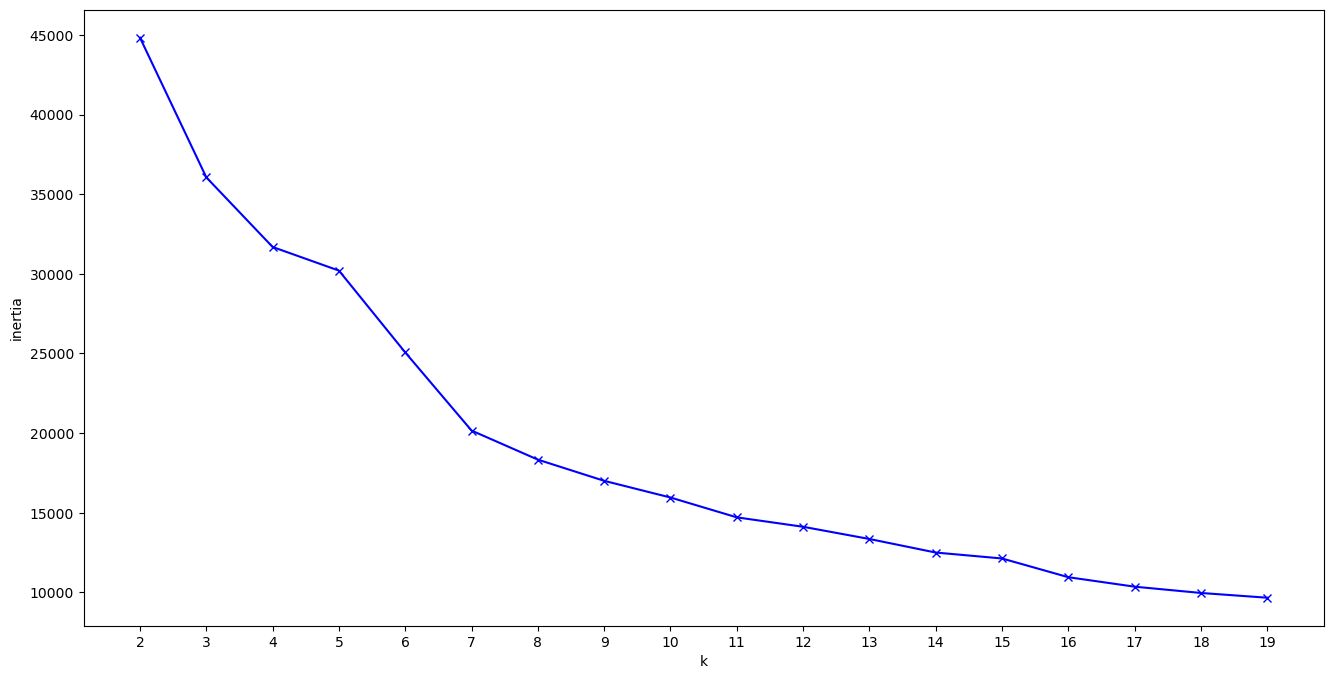

In [43]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, "bx-")
plt.xlabel("k")
plt.ylabel("inertia")
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

In [44]:
kmeans = KMeans(n_clusters=7, random_state=123)
kmeans.fit(x_prep)
cluster = kmeans.predict(x_prep)

In [45]:
data_1['Cluster_Kmeans'] = cluster
#data.drop(columns= 'Clúster_Kmeans', inplace = True)

In [48]:
data_1

,Producto,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Sal,Supermercado,Cluster_Kmeans
0,Plátano,97.692308,0.3,0.00,22.8,10.769231,1.10,0.000,mercadona,1
1,Macarrones,361.000000,1.5,0.40,72.0,3.500000,13.00,0.010,mercadona,2
2,Garbanzos Cocidos,90.000000,2.2,0.50,9.5,0.700000,5.50,2.000,mercadona,1
3,Leche Semidesnatada,46.000000,1.6,1.12,4.8,4.800000,3.12,0.052,mercadona,1
4,Aguacate,160.000000,15.0,2.10,8.5,0.700000,2.00,0.000,mercadona,1
...,...,...,...,...,...,...,...,...,...,...
9015,Cherry Peppers With Hummus And Black Olives,188.000000,12.8,1.90,12.2,8.300000,4.00,0.950,lidl,1
9016,Crunchy Chicken,249.000000,13.3,0.00,21.0,0.000000,10.90,0.000,lidl,4
9017,Arroz de Brócoli,34.000000,0.5,0.00,3.5,1.500000,2.40,0.010,lidl,1
9018,Anillas a la Romana,219.000000,7.8,1.70,29.8,0.700000,6.40,1.330,lidl,1


In [400]:
data.Cluster_Kmeans.value_counts()

Cluster_Kmeans
1    2734
5    1743
6    1471
3    1248
0     882
2     671
4     271
Name: count, dtype: int64

In [401]:
masca = data['Cluster_Kmeans'] == 1
show = data[masca]
show

,Producto,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Supermercado,Cluster_Kmeans
0,Plátano,97.692308,0.300000,0.000000,22.800000,10.769231,1.10,mercadona,1
2,Garbanzos Cocidos,90.000000,2.200000,0.500000,9.500000,0.700000,5.50,mercadona,1
3,Leche Semidesnatada,46.000000,1.600000,1.120000,4.800000,4.800000,3.12,mercadona,1
6,Leche Desnatada,34.000000,0.320000,0.200000,4.800000,4.800000,3.12,mercadona,1
8,Fresa o Freson,32.000000,0.400000,0.000000,5.510000,0.000000,0.81,mercadona,1
...,...,...,...,...,...,...,...,...,...
9006,Trio con Kale,30.000000,0.500000,0.100000,1.700000,0.500000,3.30,lidl,1
9009,Gazpacho con Tomate Rosa,93.000000,8.300000,1.200000,3.200000,2.200000,0.80,lidl,1
9010,"Smoothie Mix Zanahoria, Manzana, Melocotón, Pi...",44.000000,0.266667,0.133333,8.133333,6.800000,1.00,lidl,1
9017,Arroz de Brócoli,34.000000,0.500000,0.000000,3.500000,1.500000,2.40,lidl,1


In [50]:
prediction(data_1)

Se encontraron productos duplicados con el mismo nombre pero diferente supermercado:
Supermercados disponibles:
mercadona
carrefour
dia
lidl
No se seleccionó un supermercado específico. Mostrando todos los productos duplicados.


ValueError: Length of values (3518) does not match length of index (1759)

In [402]:
data

,Producto,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Supermercado,Cluster_Kmeans
0,Plátano,97.692308,0.3,0.00,22.8,10.769231,1.10,mercadona,1
1,Macarrones,361.000000,1.5,0.40,72.0,3.500000,13.00,mercadona,5
2,Garbanzos Cocidos,90.000000,2.2,0.50,9.5,0.700000,5.50,mercadona,1
3,Leche Semidesnatada,46.000000,1.6,1.12,4.8,4.800000,3.12,mercadona,1
4,Aguacate,160.000000,15.0,2.10,8.5,0.700000,2.00,mercadona,3
...,...,...,...,...,...,...,...,...,...
9015,Cherry Peppers With Hummus And Black Olives,188.000000,12.8,1.90,12.2,8.300000,4.00,lidl,3
9016,Crunchy Chicken,249.000000,13.3,0.00,21.0,0.000000,10.90,lidl,3
9017,Arroz de Brócoli,34.000000,0.5,0.00,3.5,1.500000,2.40,lidl,1
9018,Anillas a la Romana,219.000000,7.8,1.70,29.8,0.700000,6.40,lidl,3


In [365]:
count=0
for i in data["Producto"]:
    if "cerdo" in i.lower():
        count+=1

count

128

In [367]:
def prediction():
    producto = input('Dime un producto: ')
    masca = data['Producto'] == producto
    fila = data[masca]
    
    if fila.empty:
        print(f"El producto '{producto}' no se encuentra en el DataFrame.")
        return
    
    cluster_producto = fila['Cluster_Kmeans'].values[0]
    
    # Filtrar DataFrame para productos en el mismo cluster excluyendo el producto en cuestión
    filtered_df = data[(data['Cluster_Kmeans'] == cluster_producto) & (data['Producto'] != producto)]
    
    if filtered_df.empty:
        print(f"No hay otros productos en el mismo cluster que '{producto}'.")
        return
    
    # Eliminar columnas no necesarias para el cálculo de distancia
    filtered_df_values = filtered_df.drop(columns=['Producto', 'Supermercado','Cluster_Kmeans']).values
    fila_values = fila.drop(columns=['Producto', 'Supermercado','Cluster_Kmeans']).values
    
    # Calcular la distancia más cercana
    closest, _ = pairwise_distances_argmin_min(fila_values, filtered_df_values)
    
    closest_product = filtered_df.iloc[closest[0]]['Producto']
    print(f"El producto más similar a '{producto}' es '{closest_product}'.")

# Llamar a la función
prediction()

El producto '' no se encuentra en el DataFrame.


In [375]:
def prediction():
    producto = input('Dime un producto: ')
    masca = data['Producto'] == producto
    fila = data[masca]
    
    if fila.empty:
        print(f"El producto '{producto}' no se encuentra en el DataFrame.")
        return
    
    cluster_producto = fila['Cluster_Kmeans'].values[0]
    
    # Filtrar DataFrame para productos en el mismo cluster excluyendo el producto en cuestión
    filtered_df = data[(data['Cluster_Kmeans'] == cluster_producto) & (data['Producto'] != producto)]
    
    if filtered_df.empty:
        print(f"No hay otros productos en el mismo cluster que '{producto}'.")
        return
    
    # Eliminar columnas no necesarias para el cálculo de distancia
    filtered_df_values = filtered_df.drop(columns=['Producto', 'Supermercado','Cluster_Kmeans']).values
    fila_values = fila.drop(columns=['Producto', 'Supermercado','Cluster_Kmeans']).values
    
    # Calcular las distancias a todos los productos en el mismo cluster
    distances = pairwise_distances(fila_values, filtered_df_values).flatten()
    
    # Crear un DataFrame con productos y sus distancias
    ranking_df = filtered_df[['Producto']].copy()
    ranking_df['Distancia'] = distances
    
    # Ordenar por distancia
    ranking_df = ranking_df.sort_values(by='Distancia')
    
    print("Ranking de productos más similares:")
    print(ranking_df)

# Llamar a la función
prediction()

ValueError: Length of values (13735) does not match length of index (2747)

In [ ]:
def prediction():
    producto = input('Dime un producto: ')
    masca = data['Producto'] == producto
    fila = data[masca]
    
    if fila.empty:
        print(f"El producto '{producto}' no se encuentra en el DataFrame.")
        return
    
    cluster_producto = fila['Cluster_Kmeans'].values[0]
    
    # Filtrar DataFrame para productos en el mismo cluster excluyendo el producto en cuestión
    filtered_df = data[(data['Cluster_Kmeans'] == cluster_producto) & (data['Producto'] != producto)]
    
    if filtered_df.empty:
        print(f"No hay otros productos en el mismo cluster que '{producto}'.")
        return
    
    # Eliminar columnas no necesarias para el cálculo de distancia
    filtered_df_values = filtered_df.drop(columns=['Producto', 'Supermercado','Cluster_Kmeans']).values
    fila_values = fila.drop(columns=['Producto', 'Supermercado','Cluster_Kmeans']).values
    
    # Calcular la distancia más cercana
    closest, _ = pairwise_distances_argmin_min(fila_values, filtered_df_values)
    
    closest_product = filtered_df.iloc[closest[0]]['Producto']
    print(f"El producto más similar a '{producto}' es '{closest_product}'.")

# Llamar a la función
prediction()

El producto más similar a 'Atún en Aceite de Oliva' es 'Atún Bajo en Sal'.


In [408]:
import pandas as pd
from sklearn.metrics import pairwise_distances

# Supongamos que 'data' es tu DataFrame
# data = pd.read_csv('path_to_your_data.csv')  # Descomenta y ajusta según corresponda

def prediction():
    import pandas as pd
    from sklearn.metrics import pairwise_distances
    producto = input('Dime un producto: ')
    masca = data['Producto'] == producto
    fila = data[masca]
    
    if fila.empty:
        print(f"El producto '{producto}' no se encuentra en el DataFrame.")
        return
    
    cluster_producto = fila['Cluster_Kmeans'].values[0]
    
    # Filtrar DataFrame para productos en el mismo cluster excluyendo el producto en cuestión
    filtered_df = data[(data['Cluster_Kmeans'] == cluster_producto) & (data['Producto'] != producto)]
    
    if filtered_df.empty:
        print(f"No hay otros productos en el mismo cluster que '{producto}'.")
        return
    
    # Eliminar columnas no necesarias para el cálculo de distancia
    filtered_df_values = filtered_df.drop(columns=['Producto', 'Supermercado', 'Cluster_Kmeans']).values
    fila_values = fila.drop(columns=['Producto', 'Supermercado', 'Cluster_Kmeans']).values
    
    # Calcular las distancias a todos los productos en el mismo cluster
    distances = pairwise_distances(fila_values, filtered_df_values).flatten()
    
    # Crear un DataFrame con productos y sus distancias
    ranking_df = filtered_df.copy()
    ranking_df['Distancia'] = distances
    
    # Ordenar por distancia y seleccionar los 10 primeros
    ranking_df = ranking_df.sort_values(by='Distancia').head(10)
    
    print("Ranking de productos más similares:")
    print(ranking_df)

    return ranking_df

# Llamar a la función
prediction()


ValueError: Length of values (7476) does not match length of index (1246)

Producto
Pan de Molde Integral             7
Crema de Verduras                 6
Yogur Natural                     6
Leche Desnatada                   6
Atún Claro en Aceite de Oliva     6
                                 ..
Vinagreta                         1
Mini Pan Pasas                    1
Café Clásico Descafeinado         1
Crema para Untar de Jamón York    1
Bebida de Avena Calcio 0%         1
Name: count, Length: 7799, dtype: int64

In [410]:
masca = data['Producto'] == 'Plátano'
show = data[masca]
show

,Producto,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Supermercado,Cluster_Kmeans
0,Plátano,97.692308,0.3,0.0,22.8,10.769231,1.1,mercadona,1
38,Plátano,93.000000,0.1,0.0,21.7,17.830000,1.4,mercadona,1


In [422]:
masca = data_no_dup['Producto'] == 'Plátano'
show = data_no_dup[masca]
show

,Producto,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Supermercado,Cluster_Kmeans
0,Plátano,97.692308,0.3,0.0,22.8,10.769231,1.1,mercadona,1


# Modelo KNN con porcentajes y con KCAL

In [35]:
data = pd.read_csv('Dataset\Data_sin_duplis_percent.csv')

In [36]:
#data.to_csv('Dataset/Data_sin_duplis_percent.csv',index = False)
data

,Producto,Kcal,Grasa,Carbohidratos,Proteina,Sal,Supermercado,Saturada%,Azucares%
0,Plátano,97.692308,0.3,22.8,1.10,0.000,mercadona,0.000000,47.233468
1,Macarrones,361.000000,1.5,72.0,13.00,0.010,mercadona,26.666667,4.861111
2,Garbanzos Cocidos,90.000000,2.2,9.5,5.50,2.000,mercadona,22.727273,7.368421
3,Leche Semidesnatada,46.000000,1.6,4.8,3.12,0.052,mercadona,70.000000,100.000000
4,Aguacate,160.000000,15.0,8.5,2.00,0.000,mercadona,14.000000,8.235294
...,...,...,...,...,...,...,...,...,...
8756,Cherry Peppers With Hummus And Black Olives,188.000000,12.8,12.2,4.00,0.950,lidl,14.843750,68.032787
8757,Crunchy Chicken,249.000000,13.3,21.0,10.90,0.000,lidl,0.000000,0.000000
8758,Arroz de Brócoli,34.000000,0.5,3.5,2.40,0.010,lidl,0.000000,42.857143
8759,Anillas a la Romana,219.000000,7.8,29.8,6.40,1.330,lidl,21.794872,2.348993


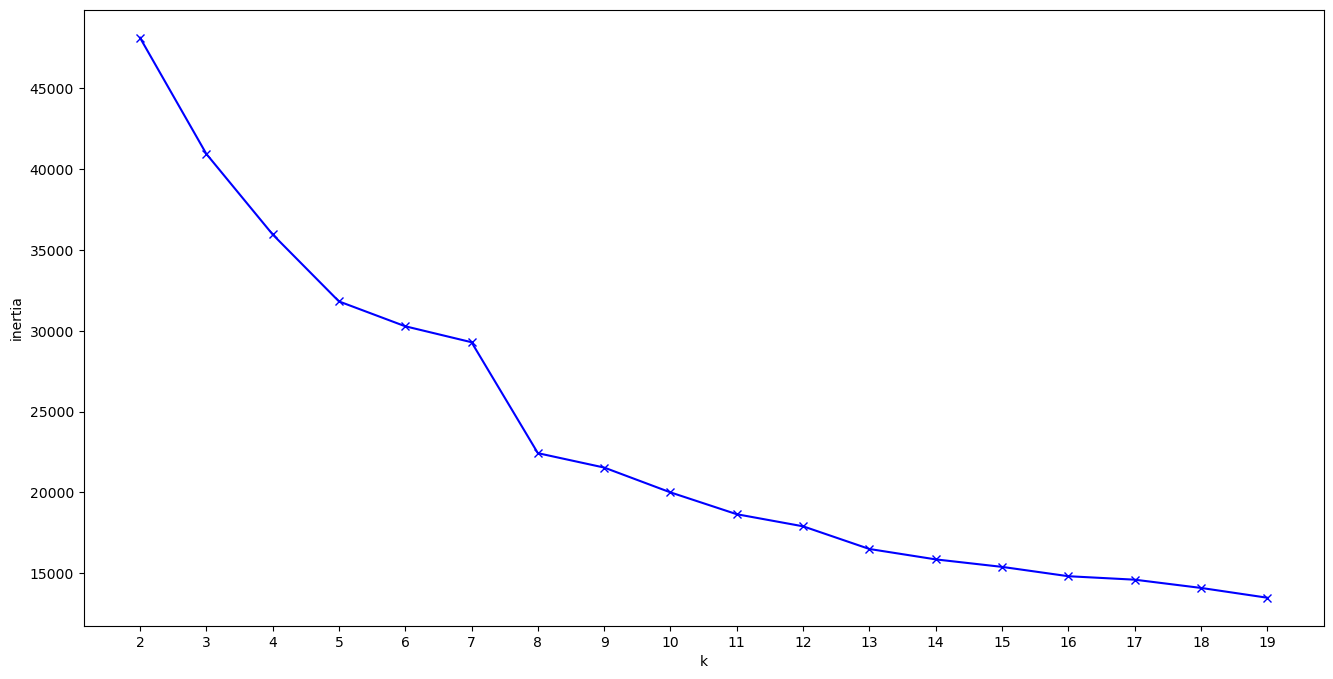

In [37]:
x=data[list(data.drop(columns=['Producto', 'Supermercado']).columns)]
scaler=StandardScaler()
x_prep=scaler.fit_transform(x)

K=range(2, 20)
inertia=[]
for k in K:
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_prep)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, "bx-")
plt.xlabel("k")
plt.ylabel("inertia")
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

In [38]:
kmeans = KMeans(n_clusters=7, random_state=123)
kmeans.fit(x_prep)
cluster = kmeans.predict(x_prep)
data['Cluster_Kmeans'] = cluster

data['Cluster_Kmeans'].value_counts()

Cluster_Kmeans
5    2165
4    1764
1    1608
6    1303
3     965
0     565
2     391
Name: count, dtype: int64

In [39]:
masca = data['Cluster_Kmeans'] == 1
show = data[masca]
show

,Producto,Kcal,Grasa,Carbohidratos,Proteina,Sal,Supermercado,Saturada%,Azucares%,Cluster_Kmeans
0,Plátano,97.692308,0.3,22.80,1.10,0.00,mercadona,0.000000,47.233468,1
8,Fresa o Freson,32.000000,0.4,5.51,0.81,0.00,mercadona,0.000000,0.000000,1
15,Tomate Pera,20.000000,0.0,4.00,0.00,0.00,mercadona,0.000000,0.000000,1
19,Tomate Frito,77.000000,3.5,9.50,1.50,1.00,mercadona,8.571429,72.631579,1
27,Zanahoria,34.000000,0.3,7.00,0.80,0.17,mercadona,16.666667,97.142857,1
...,...,...,...,...,...,...,...,...,...,...
8747,Trio con Kale,30.000000,0.5,1.70,3.30,0.00,lidl,20.000000,29.411765,1
8750,Gazpacho con Tomate Rosa,93.000000,8.3,3.20,0.80,0.56,lidl,14.457831,68.750000,1
8756,Cherry Peppers With Hummus And Black Olives,188.000000,12.8,12.20,4.00,0.95,lidl,14.843750,68.032787,1
8758,Arroz de Brócoli,34.000000,0.5,3.50,2.40,0.01,lidl,0.000000,42.857143,1


In [10]:
from functions import prediction

In [14]:
prediction(data)

Ranking de productos más similares:
                            Producto        Kcal      Grasa  Carbohidratos  \
2328                    Habas Fritas  451.000000  19.600000      38.000000   
4390            Habas Fritas con Sal  451.000000  19.600000      38.000000   
2016                       Palomitas  454.000000  23.900000      40.000000   
5588  Bizcocho sin Azúcares Añadidos  454.000000  25.900000      48.700000   
1969   Magdalena Integral sin Azucar  440.000000  23.714286      48.857143   
2657                 Regaña Artesana  447.000000  18.000000      59.000000   
7111           Mix Fun Frutos Secos   454.000000  18.200000      55.300000   
284                 Crackers Espelta  440.000000  14.500000      55.000000   
5239                    Mini Muffins  436.666667  22.000000      53.333333   
2479   Bizcocho de Limón sin Gluten   444.000000  25.000000      50.000000   

       Proteina       Sal Supermercado  Saturada%  Azucares%  Cluster_Kmeans  \
2328  24.500000  1.300000

,Producto,Kcal,Grasa,Carbohidratos,Proteina,Sal,Supermercado,Saturada%,Azucares%,Cluster_Kmeans,Distancia
2328,Habas Fritas,451.000000,19.600000,38.000000,24.500000,1.300000,mercadona,10.714286,7.368421,4,16.112892
4390,Habas Fritas con Sal,451.000000,19.600000,38.000000,24.500000,2.000000,mercadona,10.714286,7.368421,4,16.119407
2016,Palomitas,454.000000,23.900000,40.000000,11.700000,8.750000,mercadona,34.728033,2.500000,4,17.973678
5588,Bizcocho sin Azúcares Añadidos,454.000000,25.900000,48.700000,5.800000,0.500000,carrefour,15.444015,0.205339,4,19.719717
1969,Magdalena Integral sin Azucar,440.000000,23.714286,48.857143,5.714286,2.514286,mercadona,12.048193,3.508772,4,19.919903
2657,Regaña Artesana,447.000000,18.000000,59.000000,12.000000,1.600000,mercadona,14.444444,0.847458,4,19.958954
7111,Mix Fun Frutos Secos,454.000000,18.200000,55.300000,15.500000,1.200000,dia,19.230769,16.455696,4,20.058958
284,Crackers Espelta,440.000000,14.500000,55.000000,15.000000,1.000000,mercadona,10.344828,7.272727,4,20.218276
5239,Mini Muffins,436.666667,22.000000,53.333333,5.000000,0.000000,carrefour,21.212121,8.750000,4,20.597007
2479,Bizcocho de Limón sin Gluten,444.000000,25.000000,50.000000,3.900000,0.000000,mercadona,13.600000,11.800000,4,21.719978


In [21]:
def prediction(data):
    import pandas as pd
    from sklearn.metrics import pairwise_distances
    
    # Pedir al usuario el nombre del producto
    producto = input('Dime un producto: ')
    
    # Filtrar los productos que coincidan con el nombre dado
    mascarilla = data['Producto'] == producto
    fila = data[mascarilla]
    
    # Verificar si el producto está en el DataFrame
    if fila.empty:
        print(f"El producto '{producto}' no se encuentra en el DataFrame.")
        return
    
    # Obtener el cluster del producto dado
    cluster_producto = fila['Cluster_Kmeans'].values[0]
    
    # Filtrar DataFrame para productos en el mismo cluster excluyendo el producto en cuestión
    filtered_df = data[(data['Cluster_Kmeans'] == cluster_producto) & (data['Producto'] != producto)]
    
    # Verificar si hay productos en el mismo cluster
    if filtered_df.empty:
        print(f"No hay otros productos en el mismo cluster que '{producto}'.")
        return
    
    # Verificar si hay duplicados del producto dado (mismo nombre pero diferente supermercado)
    if filtered_df['Producto'].duplicated().any():
        print("Se encontraron productos duplicados con el mismo nombre pero diferente supermercado:")
        supermercados_disponibles = filtered_df['Supermercado'].unique()
        print("Supermercados disponibles:")
        print("\n".join(supermercados_disponibles))
        # Pedir al usuario que seleccione un supermercado específico
        supermercado = input("Por favor, selecciona el supermercado específico del producto (deja en blanco si no estás seguro): ").strip()
        if supermercado:
            filtered_df = filtered_df[filtered_df['Supermercado'] == supermercado]
        else:
            print("No se seleccionó un supermercado específico. Mostrando todos los productos duplicados.")
    
    # Eliminar columnas no necesarias para el cálculo de distancia
    filtered_df_values = filtered_df.drop(columns=['Producto', 'Supermercado', 'Cluster_Kmeans']).values
    fila_values = fila.drop(columns=['Producto', 'Supermercado', 'Cluster_Kmeans']).values
    
    # Calcular las distancias a todos los productos en el mismo cluster
    distances = pairwise_distances(fila_values, filtered_df_values).flatten()
    
    # Crear un DataFrame con productos y sus distancias
    ranking_df = filtered_df.copy()
    ranking_df['Distancia'] = distances
    
    # Ordenar por distancia y mostrar los 10 productos más similares
    ranking_df = ranking_df.sort_values(by='Distancia').head(10)
    
    
    return ranking_df
prediction(data)

Se encontraron productos duplicados con el mismo nombre pero diferente supermercado:
Supermercados disponibles:
mercadona
carrefour
dia
lidl
No se seleccionó un supermercado específico. Mostrando todos los productos duplicados.


,Producto,Kcal,Grasa,Carbohidratos,Proteina,Sal,Supermercado,Saturada%,Azucares%,Cluster_Kmeans,Distancia
64,Frutos Rojos Congelados,103.0,1.9,9.0,1.4,0.00,mercadona,0.000000,57.777778,1,18.233049
3646,Salsa,88.0,0.0,18.6,2.0,0.00,mercadona,0.000000,31.720430,1,18.791891
1290,Salsa Bbq Zero,88.0,0.0,18.6,2.0,2.00,mercadona,0.000000,31.720430,1,18.898021
5536,Salsa Napolitana,94.0,4.8,9.4,1.9,0.00,carrefour,8.333333,56.382979,1,19.163536
4706,Lentejas Cocidas,88.0,0.0,13.0,6.6,0.69,carrefour,0.000000,34.615385,1,19.493921
3817,Sazonador Ensalada,110.0,2.5,10.5,4.2,0.16,mercadona,4.000000,55.238095,1,19.932861
7612,Mostaza,106.0,4.9,11.0,3.7,2.70,dia,6.122449,36.363636,1,19.977622
5043,Poke Salmón y Mango,94.0,1.8,13.0,5.8,0.00,carrefour,16.666667,43.846154,1,20.573401
1317,Cebolla Frita con Aceite de Oliva,108.0,6.0,11.2,1.4,2.50,mercadona,13.333333,49.107143,1,21.469209
6793,Parrillada de Verduras,81.0,3.2,9.6,2.3,0.13,dia,3.125000,45.833333,1,21.782241


In [52]:
def prediction(data):
    import pandas as pd
    from sklearn.metrics import pairwise_distances
    
    # Pedir al usuario el nombre del producto
    producto = input('Dime un producto: ')
    
    # Filtrar los productos que coincidan con el nombre dado
    mascarilla = data['Producto'] == producto
    fila = data[mascarilla]
    
    # Verificar si el producto está en el DataFrame
    if fila.empty:
        print(f"El producto '{producto}' no se encuentra en el DataFrame.")
        return
    
    # Obtener el cluster del producto dado
    cluster_producto = fila['Cluster_Kmeans'].values[0]
    
    # Filtrar DataFrame para productos en el mismo cluster excluyendo el producto en cuestión
    filtered_df = data[(data['Cluster_Kmeans'] == cluster_producto) & (data['Producto'] != producto)]
    
    # Verificar si hay productos en el mismo cluster
    if filtered_df.empty:
        print(f"No hay otros productos en el mismo cluster que '{producto}'.")
        return
    
    # Verificar si hay duplicados del producto dado (mismo nombre pero diferente supermercado)
    if filtered_df['Producto'].duplicated().any():
        print("Se encontraron productos duplicados con el mismo nombre pero diferente supermercado:")
        
        # Mostrar los productos duplicados
        productos_duplicados = filtered_df[filtered_df['Producto'] == producto]
        print(productos_duplicados[['Producto', 'Supermercado']])
        
        # Pedir al usuario que seleccione un supermercado específico
        supermercado = input(f"Por favor, selecciona el supermercado específico para '{producto}': ").strip()
        
        # Validar que el supermercado seleccionado esté en los duplicados mostrados
        while supermercado not in productos_duplicados['Supermercado'].values:
            print(f"Supermercado '{supermercado}' no válido para '{producto}'.")
            supermercado = input(f"Selecciona el supermercado específico para '{producto}': ").strip()
        
        # Filtrar por el producto y supermercado seleccionados
        filtered_df = filtered_df[(filtered_df['Producto'] == producto) & (filtered_df['Supermercado'] == supermercado)]
    
    # Eliminar columnas no necesarias para el cálculo de distancia
    filtered_df_values = filtered_df.drop(columns=['Producto', 'Supermercado', 'Cluster_Kmeans']).values
    fila_values = fila.drop(columns=['Producto', 'Supermercado', 'Cluster_Kmeans']).values
    
    # Calcular las distancias a todos los productos en el mismo cluster
    distances = pairwise_distances(fila_values, filtered_df_values).flatten()
    
    # Crear un DataFrame con productos y sus distancias
    ranking_df = filtered_df.copy()
    ranking_df['Distancia'] = distances
    
    # Ordenar por distancia y mostrar los 10 productos más similares
    ranking_df = ranking_df.sort_values(by='Distancia').head(10)
    
    print("Ranking de productos más similares:")
    print(ranking_df)
    
    return ranking_df
prediction(data_1)

Se encontraron productos duplicados con el mismo nombre pero diferente supermercado:
Empty DataFrame
Columns: [Producto, Supermercado]
Index: []
Supermercado 'mercadona' no válido para 'Macarrones'.
Supermercado '' no válido para 'Macarrones'.
Supermercado '' no válido para 'Macarrones'.
Supermercado '' no válido para 'Macarrones'.
Supermercado '' no válido para 'Macarrones'.
Supermercado '' no válido para 'Macarrones'.
Supermercado '' no válido para 'Macarrones'.
Supermercado '' no válido para 'Macarrones'.
Supermercado '' no válido para 'Macarrones'.


KeyboardInterrupt: Interrupted by user

In [82]:
def prediction(data):
    import pandas as pd
    from sklearn.metrics import pairwise_distances

    #Preguntamos al usuario qué producto quiere seleccionar
    producto = input('Dime un producto: ')
    masca = data['Producto'] == producto

    #Si el producto está duplicado en el Dataframe por estar en varios supermercados:
    macarrones = data[masca]
    if len(macarrones)>1:
        print(macarrones['Supermercado'].unique())
        
        supermercado = input('Selecciona el supermercado del producto comentado:')
         
        mascarilla = (data['Producto'] == producto) & (data['Supermercado'] == supermercado)
    
    #No encontramos producto
    elif len(macarrones) == 0:
        return 'no producto found'
    #Si el producto no tiene dupplicados
    else:
        mascarilla = (data['Producto'] == producto)
    
    fila = data[mascarilla]
    cluster_producto = fila['Cluster_Kmeans'].values[0]

    #Filtramos para quitar el producto del que usuario (también quitamos el mismo producto de otro super, ya de paso seleccionamos el mismo cluster)
    filtrado = data[(data['Cluster_Kmeans'] == cluster_producto) & (data['Producto'] != producto)]

    #elminamos las columnas no numércias.
    filtrado_values = filtrado.drop(columns=['Producto', 'Supermercado', 'Cluster_Kmeans']).values
    fila_values = fila.drop(columns=['Producto', 'Supermercado', 'Cluster_Kmeans']).values

    #Distancias:
    distances = pairwise_distances(fila_values, filtrado_values).flatten()
    ranking = filtrado.copy()
    ranking['Distancia'] = distances

    ranking10 = ranking.sort_values(by='Distancia').head(10)
    print('Productos más similares:')
    return ranking10

prediction(data_1)
    

Productos más similares:


,Producto,Kcal,Grasa,Grasas saturadas,Carbohidratos,Azucares,Proteina,Sal,Supermercado,Cluster_Kmeans,Distancia
1399,Queso Viejo,411.0,34.0,25.0,2.0,0.5,25.0,1.50,mercadona,3,4.415880
2465,Queso Semicurado sin Lactosa,410.0,34.0,24.0,1.0,0.5,25.0,1.60,mercadona,3,4.450843
2334,Queso Viejo Intenso,411.0,34.0,25.0,2.0,0.8,25.0,2.00,mercadona,3,4.619524
2897,Queso Viejo Madurado en Cava,410.0,34.0,23.3,1.0,1.0,25.0,1.90,mercadona,3,4.647580
8808,Queso Madurado en Cava,410.0,34.0,23.3,1.0,1.0,25.0,2.00,lidl,3,4.689350
6336,Cheddar Mature,415.0,35.0,22.0,0.1,0.1,25.0,0.00,carrefour,3,4.829079
729,Queso Cheddar Curado,410.0,34.4,21.7,0.5,0.5,25.0,1.80,mercadona,3,4.908156
1848,Cheddar Curado,410.0,34.4,21.7,0.5,0.5,25.0,1.80,mercadona,3,4.908156
5314,Queso de Vaca Curado,413.0,35.0,22.0,0.0,0.0,24.0,4.25,carrefour,3,5.344390
5590,Queso Ibérico Curado,415.0,35.0,25.0,1.0,0.0,24.0,3.75,carrefour,3,5.437141


In [83]:
prediction(data)

Productos más similares:


,Producto,Kcal,Grasa,Carbohidratos,Proteina,Sal,Supermercado,Saturada%,Azucares%,Cluster_Kmeans,Distancia
2789,Queso Viejo Madurado en Cava,410.0,34.0,1.0,25.0,1.90,mercadona,68.529412,100.0,0,4.932527
8549,Queso Madurado en Cava,410.0,34.0,1.0,25.0,2.00,lidl,68.529412,100.0,0,4.971903
1788,Cheddar Curado,410.0,34.4,0.5,25.0,1.80,mercadona,63.081395,100.0,0,5.626204
706,Queso Cheddar Curado,410.0,34.4,0.5,25.0,1.80,mercadona,63.081395,100.0,0,5.626204
6131,Cheddar Mature,415.0,35.0,0.1,25.0,0.00,carrefour,62.857143,100.0,0,5.802799
8085,Queso Chedar,416.0,34.9,0.1,25.4,0.00,lidl,62.177650,100.0,0,7.005802
7466,Cheddar Extra Mature,416.0,34.9,0.5,25.4,1.80,dia,62.177650,100.0,0,7.222276
8285,Queso Cheddar Añejo,416.0,34.9,0.5,25.4,1.81,lidl,62.177650,100.0,0,7.224775
8407,Queso Pesto,397.0,34.0,0.5,24.0,2.00,lidl,61.764706,100.0,0,16.156399
5548,Queso Gruyere France,396.0,32.0,0.5,27.0,0.70,carrefour,65.625000,100.0,0,17.279325


# Modelo KNN con porcentajes sin Calorías sin sal y porcentajes (WINNER per ara)


In [108]:
data_2 = pd.read_csv('Dataset/Data_sin_duplis_percent.csv')
data_2.drop(columns = ['Kcal','Sal'], inplace = True)


In [109]:
data_2

,Producto,Grasa,Carbohidratos,Proteina,Supermercado,Saturada%,Azucares%
0,Plátano,0.3,22.8,1.10,mercadona,0.000000,47.233468
1,Macarrones,1.5,72.0,13.00,mercadona,26.666667,4.861111
2,Garbanzos Cocidos,2.2,9.5,5.50,mercadona,22.727273,7.368421
3,Leche Semidesnatada,1.6,4.8,3.12,mercadona,70.000000,100.000000
4,Aguacate,15.0,8.5,2.00,mercadona,14.000000,8.235294
...,...,...,...,...,...,...,...
8756,Cherry Peppers With Hummus And Black Olives,12.8,12.2,4.00,lidl,14.843750,68.032787
8757,Crunchy Chicken,13.3,21.0,10.90,lidl,0.000000,0.000000
8758,Arroz de Brócoli,0.5,3.5,2.40,lidl,0.000000,42.857143
8759,Anillas a la Romana,7.8,29.8,6.40,lidl,21.794872,2.348993


In [110]:

def KNN(data):
    x=data[list(data.drop(columns=['Producto', 'Supermercado']).columns)]
    scaler=StandardScaler()
    x_prep=scaler.fit_transform(x)

    K=range(2, 20)
    inertia=[]
    for k in K:
        kmeans=KMeans(n_clusters=k, random_state=42)
        kmeans.fit(x_prep)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(16,8))
    plt.plot(K, inertia, "bx-")
    plt.xlabel("k")
    plt.ylabel("inertia")
    plt.xticks(np.arange(min(K), max(K)+1, 1.0))
    plt.show()

    clst = input('Número clústers:')
    kmeans = KMeans(n_clusters=int(clst), random_state=123)
    kmeans.fit(x_prep)
    cluster = kmeans.predict(x_prep)
    data['Cluster_Kmeans'] = cluster

    return data['Cluster_Kmeans'].value_counts()

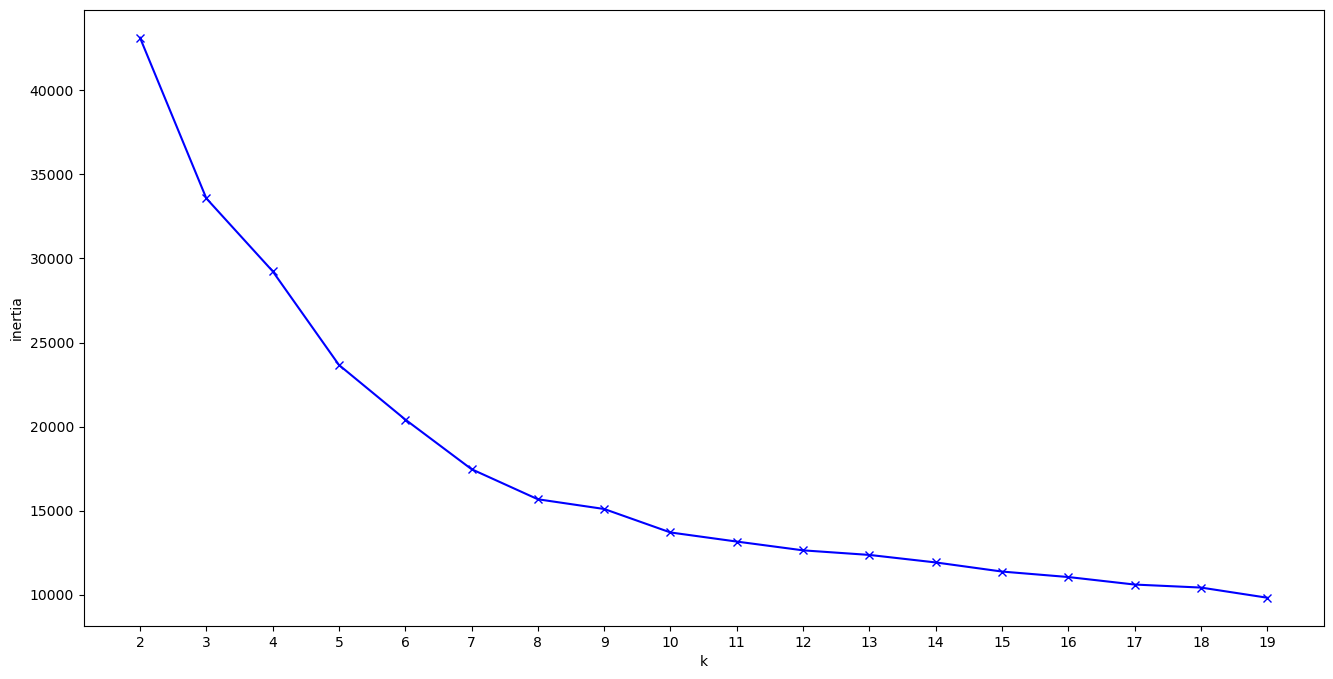

Cluster_Kmeans
1    3189
7    1208
3    1051
6    1035
2     918
4     514
5     450
0     396
Name: count, dtype: int64

In [116]:
KNN(data_2)

In [117]:
masca = data_2['Cluster_Kmeans'] == 0
show = data_2[masca]
show

,Producto,Grasa,Carbohidratos,Proteina,Supermercado,Saturada%,Azucares%,Cluster_Kmeans
12,Queso Havarti Light en Lonchas,17.000000,1.600000,27.000000,mercadona,70.588235,32.500000,0
17,Lomo Embuchado Extra,5.000000,0.500000,38.000000,mercadona,38.000000,100.000000,0
34,Lomo Embuchado,5.000000,0.500000,38.000000,mercadona,38.000000,100.000000,0
82,Cacao Puro Desgrasado en Polvo,16.000000,16.300000,25.500000,mercadona,63.750000,4.294479,0
84,Cacahuete en Polvo Desgrasado,13.200000,21.000000,46.700000,mercadona,12.878788,47.619048,0
...,...,...,...,...,...,...,...,...
8719,Snack de Queso Sabor Trufa,42.000000,0.000000,47.000000,lidl,69.047619,0.000000,0
8734,Protein Bar Coconut,12.222222,25.111111,50.000000,lidl,60.000000,10.619469,0
8746,Gidrolizado,1.567568,1.527027,85.135135,lidl,32.758621,54.867257,0
8749,Adler del Tirol,32.000000,0.000000,26.000000,lidl,64.375000,0.000000,0


In [134]:
prediction(data_2)

['mercadona' 'carrefour' 'dia' 'lidl']
Productos más similares:


,Producto,Grasa,Carbohidratos,Proteina,Supermercado,Saturada%,Azucares%,Cluster_Kmeans,Distancia
244,Tomate Frito con Aceite de Oliva,3.5,9.5,1.5,mercadona,8.571429,72.631579,3,0.000000
3170,Tomate Frito Abrir y Servir,3.5,9.5,1.5,mercadona,8.571429,72.631579,3,0.000000
220,Tomate Frito sin Sal Ni Azúcares Añadidos,3.5,6.5,1.5,mercadona,8.571429,72.307692,3,3.017433
5880,Salsa Piamontesa,4.0,7.0,1.4,carrefour,10.000000,70.000000,3,3.933958
7920,Tomate Frito Vegecampo,3.3,8.7,1.3,dia,12.121212,70.114943,3,4.433331
6221,Mostaza,4.5,6.6,4.5,carrefour,6.666667,74.242424,3,4.963158
6920,Pisto de Verduras con Tomate,6.8,5.8,1.4,dia,10.294118,74.137931,3,5.461388
710,Pisto de Verduras Ratatouille,2.6,7.3,1.6,mercadona,11.538462,76.712329,3,5.578154
2777,Tomate Triturado con Cebolla,1.0,6.9,1.2,mercadona,10.000000,76.811594,3,5.710809
8760,Bebida de Avena Calcio 0%,0.8,8.3,1.4,lidl,12.500000,75.903614,3,5.905920


# DBSCAN

In [140]:
data_3 = pd.read_csv('Dataset/Data_sin_duplis_percent.csv')
data_3.drop(columns = ['Kcal','Sal'], inplace = True)

In [141]:
data_3

,Producto,Grasa,Carbohidratos,Proteina,Supermercado,Saturada%,Azucares%
0,Plátano,0.3,22.8,1.10,mercadona,0.000000,47.233468
1,Macarrones,1.5,72.0,13.00,mercadona,26.666667,4.861111
2,Garbanzos Cocidos,2.2,9.5,5.50,mercadona,22.727273,7.368421
3,Leche Semidesnatada,1.6,4.8,3.12,mercadona,70.000000,100.000000
4,Aguacate,15.0,8.5,2.00,mercadona,14.000000,8.235294
...,...,...,...,...,...,...,...
8756,Cherry Peppers With Hummus And Black Olives,12.8,12.2,4.00,lidl,14.843750,68.032787
8757,Crunchy Chicken,13.3,21.0,10.90,lidl,0.000000,0.000000
8758,Arroz de Brócoli,0.5,3.5,2.40,lidl,0.000000,42.857143
8759,Anillas a la Romana,7.8,29.8,6.40,lidl,21.794872,2.348993


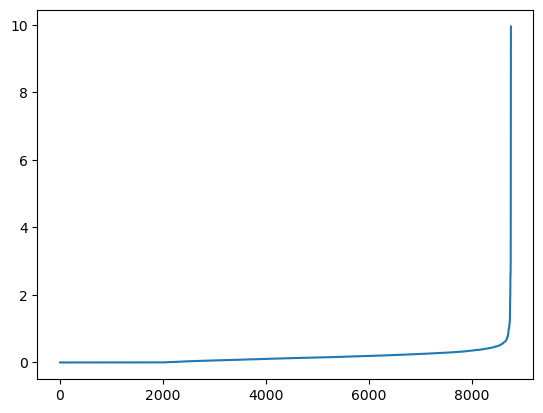

In [148]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
%matplotlib inline

scaler = StandardScaler()

scaler.fit(data_3.drop(columns = ['Supermercado', 'Producto']))

X_scaled = scaler.transform(data_3.drop(columns = ['Supermercado', 'Producto']))

X_scaled_df = pd.DataFrame(X_scaled, columns = data_3.drop(columns = ['Supermercado', 'Producto']).columns )

# Setting the parameters for DBSCAN based on our dataset
min_samples = 2 * len( data_3.drop(columns = ['Supermercado', 'Producto']).columns )
k = min_samples

# Computing distances
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit( X_scaled_df )

# Find the k-Nearest Neigbors of a point
distances, indices = neighbors_fit.kneighbors( X_scaled_df )

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

epsilon = 0.2

model = DBSCAN(eps = epsilon, min_samples = min_samples)
# This will take some time, especially if you have lots of columns
clusters = model.fit_predict(data_3.drop(columns = ['Supermercado', 'Producto'])) #FALTA COMPLETAR

data_3['cluster'] = clusters

In [149]:
data_3['cluster'].value_counts()

cluster
-1    8692
 1      52
 0      17
Name: count, dtype: int64

# GMM

In [163]:
data_4 = pd.read_csv('Dataset/Data_sin_duplis_percent.csv')
data_4.drop(columns = ['Kcal','Sal'], inplace = True)

from sklearn.model_selection import train_test_split

X = data_4.drop(['Producto', 'Supermercado'], axis = 1)

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

min_samples = 2 * len( X.columns )
k = min_samples

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

X_scaled_df = pd.DataFrame( X_scaled_df, columns = X.columns )

# Set the number of desired clusters beforehand.
# k = number_of_desired_clusters

# Important: the parameter "covariance_type" controls the shape of the gaussian. By default is set to 'full' which has the highest flexibility.
model = GaussianMixture(n_components = k ) 

# This will take some time, especially if you have lots of columns
model.fit( X_scaled_df )

clusters = model.predict( X_scaled_df )

data_4['Cluster_Kmeans'] = clusters

In [164]:
data_4['Cluster_Kmeans'].value_counts()

Cluster_Kmeans
1    2036
5    1454
8    1154
0    1140
4     938
2     622
6     574
3     518
7     212
9     113
Name: count, dtype: int64

In [166]:
masca = data_4['Cluster_Kmeans'] == 1
show = data_4[masca]
show

,Producto,Grasa,Carbohidratos,Proteina,Supermercado,Saturada%,Azucares%,Cluster_Kmeans
1,Macarrones,1.500000,72.0,13.000000,mercadona,26.666667,4.861111,1
2,Garbanzos Cocidos,2.200000,9.5,5.500000,mercadona,22.727273,7.368421,1
21,Lentejas Cocidas,0.400000,10.7,8.200000,mercadona,25.000000,4.672897,1
22,Tortitas de Maíz,1.666667,80.0,7.666667,mercadona,20.000000,1.250000,1
23,Arroz Blanco,0.700000,77.0,7.200000,mercadona,28.571429,0.649351,1
...,...,...,...,...,...,...,...,...
8745,Spatzli,3.900000,28.6,7.300000,lidl,20.512821,3.846154,1
8752,Next Level Burger Pollo,15.300000,10.5,11.300000,lidl,28.758170,16.190476,1
8753,Next Level Burger Chicken Style,15.300000,10.5,11.300000,lidl,28.758170,16.190476,1
8757,Crunchy Chicken,13.300000,21.0,10.900000,lidl,0.000000,0.000000,1


In [171]:
prediction(data_4)

Productos más similares:


,Producto,Grasa,Carbohidratos,Proteina,Supermercado,Saturada%,Azucares%,Cluster_Kmeans,Distancia
3179,Tacos de Pota en Aceite de Girasol,9.444444,1.481481,21.666667,mercadona,0.000000,0.0,4,1.394069
7916,Pollo Relleno Mini,10.100000,1.100000,20.300000,dia,0.000000,0.0,4,1.479865
3219,Pollo Asado con Salsa,10.000000,0.800000,22.000000,mercadona,0.000000,0.0,4,1.708801
4992,Carne Picada de Pavo,9.600000,0.000000,19.000000,carrefour,0.000000,0.0,4,2.059126
8119,Filete de Dorada,9.500000,2.100000,19.500000,lidl,0.000000,0.0,4,2.104757
1071,Filetes de Trucha,6.000000,0.000000,20.000000,mercadona,0.000000,0.0,4,2.973214
718,Contramuslo de Pollo sin Piel,6.300000,0.200000,19.000000,mercadona,0.000000,0.0,4,3.106445
8335,Pavo,12.000000,0.800000,21.600000,lidl,0.000000,0.0,4,3.304542
8069,Carne de Vaca,12.400000,0.000000,18.900000,lidl,0.000000,0.0,4,4.114608
2618,Rodajas de Poton del Pacifico,6.200000,1.300000,21.000000,mercadona,3.225806,0.0,4,4.206641


# Categorización productos



Nos basamos en las categorización de Mercadona:

Animales:
- Carne
- Pescado
- Charcutería
- Marisco
- Huevos
- Leche
- Yogures
- Queso
- Mantequilla

Fruta y verdura:
- Fruta 
- Verdura
- Zumos de fruta
- Derivados de fruta y verdura (Guacamole y tal)

Arroz, legumbres y pasta:
- Arroz
- legumbres
- Pasta
- Cereales

Bebidas:
- Agua
- Refrescos
- Café
- infusiones

Procesados:
- Pan
- Postres
- Azucar
- Caramelos
- Chocolate
- Galletas

-Aceite y salsas:
- Aceite
- Salsas


Otros:
- Aperitivos



In [66]:
data = pd.read_csv('Dataset/Data_sin_duplis_percent.csv')

In [69]:
data

,Producto,Kcal,Grasa,Saturada%,Carbohidratos,Azucares%,Proteina,Sal,Supermercado
0,Plátano,97.692308,0.3,0.000000,22.8,47.233468,1.10,0.000,mercadona
1,Macarrones,361.000000,1.5,26.666667,72.0,4.861111,13.00,0.010,mercadona
2,Garbanzos Cocidos,90.000000,2.2,22.727273,9.5,7.368421,5.50,2.000,mercadona
3,Leche Semidesnatada,46.000000,1.6,70.000000,4.8,100.000000,3.12,0.052,mercadona
4,Aguacate,160.000000,15.0,14.000000,8.5,8.235294,2.00,0.000,mercadona
...,...,...,...,...,...,...,...,...,...
8756,Cherry Peppers With Hummus And Black Olives,188.000000,12.8,14.843750,12.2,68.032787,4.00,0.950,lidl
8757,Crunchy Chicken,249.000000,13.3,0.000000,21.0,0.000000,10.90,0.000,lidl
8758,Arroz de Brócoli,34.000000,0.5,0.000000,3.5,42.857143,2.40,0.010,lidl
8759,Anillas a la Romana,219.000000,7.8,21.794872,29.8,2.348993,6.40,1.330,lidl


In [68]:
data = data.reindex(columns=['Producto','Kcal','Grasa','Saturada%','Carbohidratos','Azucares%','Proteina','Sal','Supermercado'])

In [51]:
prova  = data.copy()

In [70]:
def categorizar_producto(producto):
    for categoria, palabras in categorias.items():
        if any(palabra in producto.lower() for palabra in palabras):
            return categoria
    return ''

In [104]:
categorias = {
    'Derivados de animales y sustitutivos': ['atún','atun', 'sardin'],


    'Aceite y salsas' : ['aceite','tomate frito','salsa','olivada','bechamel','pesto','ketchup','alioli','tahini','chili','mostaza','vinagre','allioli'],

    'Procesados' : ['barquillos','stracciatella','galleta','gelatina','pizza','helado','natillas','magdalena','berlina','patatas fritas','roscón','bocaditos',
                    'turrón','banoffee','saladitos','chocolate','cacao','palmera','palomitas','maria','nachos','rollito','gallet','churros','membrillo',
                   'sandwich','samosa','relleno','beurre','varita','dipster','digestive','delicias','croqueta','ensatun','lasaña','ensaladilla','vainilla','cono',
                   'tequeño','poke','bollo','choco','smoothie','4 estaciones','moussaka','hojaldre','donettes','donut','bar','lionesas','temptation','mantecado','donete','bizco',
                   'tarta','cookie','flash','callos','escalope','pastel','cordon','brownie','masa','frito','ensaimada','gyoza','chips','canelon','rosquita','mona','torreznos',
                   'croissant','napolitana','fideua','nuggets','tostakid','bolognese','cracker','crunchy','chicle','chuche','bocadillo','caldo','polo',
                   'preparado','colorante','sazon','vital fruits','edulcorante','sacarina','fructosa'],

    

    'Derivados de animales y sustitutivos': ['pollo','muslo','leche','pavo','yogurt','pechuga','cerdo','cheese','queso','tortilla','+proteina','atún','yogur','surimi','burguer'
                 'hamburguesa','salchichón','jamón','jacobo','sushi','sardinillas','nata','albóndiga','tofu','churrasco','sardinillas','huevo','navajas','concha',
                            'camaron','buguer','meat','longaniza','mantequilla','margarina','kefir','kéfir','bacalao','york','pota','poton','petit sabores','quesito','sepia',
                            'mejillones','mortadela','bifidus','cabra','lomo','mayo','salmón','miel','merluza','péché','cangrejo','filete','paté','paleta','fuet','cochino','hamburguesa',
                            'sardina','butifarra','picada','jamon','+prote','codorniz','salmon','ternera','chorizo','gamba','mejillon','mejillón','navaj','roquefort','mozzare',
                            'bacon','calamar','pulpo','lacon','lacón','pescado','burrata','mascarpone','salchicha','salami','langostino','almeja','chistorra','ricotta','medallón','vacuno',
                            'burguer','camembert','burgos','mar','seitán','costilla','conejo','falafel','seitan','bonito','gamb','maxiburger','emmental','sashimi','anillas','pork','edam',
                            'gallina', 'jabalí','frankfurt','atun','huevas','cheddar','havarti','gula','maxi burger','anchoa','foie','vieira','espetec','solomillo','chipiron','fiambre','morcilla','parmigi',
                            'cuña','berberecho','bistec','vacío','pecorino','dorada','iberico','vaca','secreto','ventresca','sobrasada','skyr','almej','entrecot','chicken','tocino','tintorera','pote',
                            'entraña','burger','boquerón','pepperoni','pez','pato','trasero','caballa','lenguado','gouda','cordero','pescadilla','chuleta','gorgonzola','chedar','cheddar','trucha',
                            'actimel'],

    'Fruta y verdura': ['ajo','plátano','aguacate','judia','judía','fresa','espinacas','alcachofa','patata','pasas','verdura','pimiento','brotes','maiz','crema','piña','ensalada',
                        'pepin','acelgas','pisto','frutos rojos','jengibre','espinaca','rucula','canónigos','aceitun','coliflor','tomate','canónigo','rúcula','gourmet maxi',
                       'kale','calabacín','gazpacho','mandarina','espárrago','anándano','berenjena','pera','albaricoque','hortaliza','pera','seta','edamame','guindilla','fruta',
                       'vegetal','alcaparra','arándano','bean','zanahoria','iceberg','dátil','perejil','mango','guacamole','brócoli','naranja','ciruela',
                       'cebolla','pasa','trufa','champiñon','lechuga','escarola','bayas','manzana','jalapeño','acelga','maiz','maíz','champi','curado','parmigiano','pimentón','pimiemto','limón',
                       'olivas','kiwi','batata','brocoli','remolacha','salmorejo','alcapa','puerro','rovellon','frambuesa','pink lady','leaf','piñón','piñon','menestra','higo','cardo','palmito','papaya',
                       'judión','endivia','endibia','yuca','lavada','apio','calabaza','rústica','horchata'],

    'Legumbres, arroz y cerales': ['quinoa','macarrones','garbanzos','ravioli','pan','lenteja','arroz','baguette','pistacho','soja','pasta','anacardo','bagel',
                                  'harina','muesli','arroc','altramuc','garbanzo','espaguetis','cereales','barrita','flakes','penne','nueces','almendra',
                                 'cacahuete','fideos','nuez','estrella','espelta','hummus','picos','integral','gnocchi','spaguetti','noodles','hogaza',
                                 'spaghetti','cuscus','biscote','cocktail oriental','avena','tagliatelle','tortiglioni','macadamia','tiburones','alubia','frutos secos',
                                 'guisante','haba','cocktail','brioche','tallarín','tallarin','macarrón','chapata','ñoquis','maravilla','pa ','cous cous','viena','levadura','regañas',
                                 'pipas','avellana','trigo','estrellita','legumbre','fideo','espirales','picatostes','chía','tostada','sésamo','cuscús','multicereal','tortellini','lazos',
                                 'castaña','hélices','couscous','coles','ultracongeladas','cúrcuma','semilla'],

    'Bebidas' : ['café','cola','tónica','lambrusco','zumo','bebida','shandy','drink','néctar','gas','iso','limonada','light','té','infusión','manzanilla','bitter','tea','cerveza',
                'caffe','capuccino','cappuccino','poleo','cafe','te '],
    'recat' : ['']



    
}

data['Categoria'] = data['Producto'].str.lower().apply(categorizar_producto)

In [56]:
masca = prova['Categoria'] == ''
show = prova[masca]
print(len(show))
show.sample(20)

NameError: name 'prova' is not defined

In [96]:
data

,Producto,Kcal,Grasa,Saturada%,Carbohidratos,Azucares%,Proteina,Sal,Supermercado,Categoria,Cluster_Kmeans
0,Plátano,97.692308,0.3,0.000000,22.8,47.233468,1.10,0.000,mercadona,Fruta y verdura,4
1,Macarrones,361.000000,1.5,26.666667,72.0,4.861111,13.00,0.010,mercadona,"Legumbres, arroz y cerales",3
2,Garbanzos Cocidos,90.000000,2.2,22.727273,9.5,7.368421,5.50,2.000,mercadona,"Legumbres, arroz y cerales",4
3,Leche Semidesnatada,46.000000,1.6,70.000000,4.8,100.000000,3.12,0.052,mercadona,Derivados de animales y sustitutivos,1
4,Aguacate,160.000000,15.0,14.000000,8.5,8.235294,2.00,0.000,mercadona,Fruta y verdura,4
...,...,...,...,...,...,...,...,...,...,...,...
8756,Cherry Peppers With Hummus And Black Olives,188.000000,12.8,14.843750,12.2,68.032787,4.00,0.950,lidl,"Legumbres, arroz y cerales",4
8757,Crunchy Chicken,249.000000,13.3,0.000000,21.0,0.000000,10.90,0.000,lidl,Derivados de animales y sustitutivos,4
8758,Arroz de Brócoli,34.000000,0.5,0.000000,3.5,42.857143,2.40,0.010,lidl,Fruta y verdura,4
8759,Anillas a la Romana,219.000000,7.8,21.794872,29.8,2.348993,6.40,1.330,lidl,Derivados de animales y sustitutivos,3


In [105]:

data['Categoria'] = np.where(data['Categoria'] == 'recat','Procesados',data['Categoria'])
print(data['Categoria'].value_counts())

Categoria
Derivados de animales y sustitutivos    3764
Procesados                              2072
Legumbres, arroz y cerales              1263
Fruta y verdura                         1233
Aceite y salsas                          258
Bebidas                                  171
Name: count, dtype: int64


In [31]:
def prediction(data):
    import pandas as pd
    from sklearn.metrics import pairwise_distances

    #Preguntamos al usuario qué producto quiere seleccionar
    producto = input('Dime un producto: ')
    masca = data['Producto'] == producto


    #Si el producto está duplicado en el Dataframe por estar en varios supermercados:
    macarrones = data[masca]
    if len(macarrones)>1:
        print(macarrones['Supermercado'].unique())
        
        supermercado = input('Selecciona el supermercado del producto comentado:')
         
        mascarilla = (data['Producto'] == producto) & (data['Supermercado'] == supermercado)
    
    #No encontramos producto
    elif len(macarrones) == 0:
        return 'no producto found'
    #Si el producto no tiene dupplicados
    else:
        mascarilla = (data['Producto'] == producto)
    
    fila = data[mascarilla]
    cluster_producto = fila['Cluster_Kmeans'].values[0]
    cat = fila['Categoria'].values[0]

    #Filtramos para quitar el producto del que usuario (también quitamos el mismo producto de otro super, ya de paso seleccionamos el mismo cluster)
    filtrado = data[(data['Cluster_Kmeans'] == cluster_producto) & (data['Producto'] != producto) & (data['Categoria'] == cat)]

    #elminamos las columnas no numércias.
    filtrado_values = filtrado.drop(columns=['Producto', 'Supermercado', 'Cluster_Kmeans','Categoria']).values
    fila_values = fila.drop(columns=['Producto', 'Supermercado', 'Cluster_Kmeans','Categoria']).values

    #Distancias:
    distances = pairwise_distances(fila_values, filtrado_values).flatten()
    ranking = filtrado.copy()
    ranking['Distancia'] = distances

    ranking10 = ranking.sort_values(by='Distancia').head(10)
    print('Productos más similares:')
    return ranking10



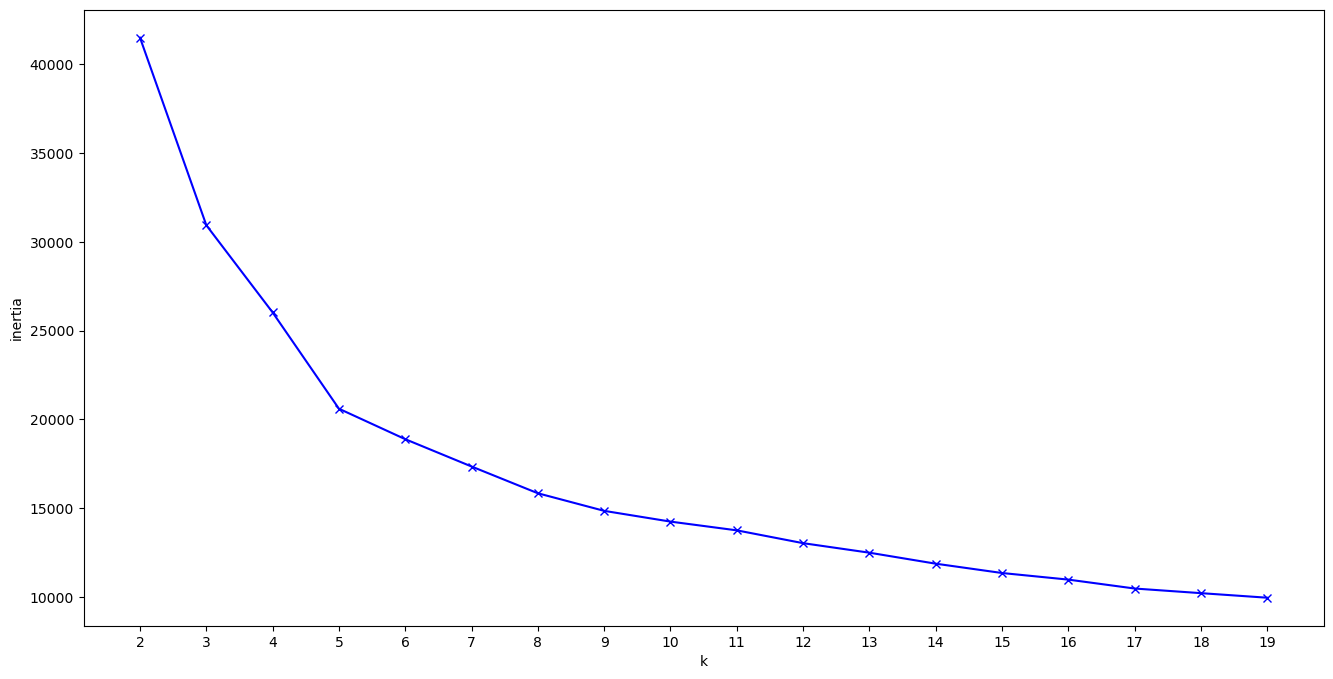

Cluster_Kmeans
2    2384
3    2285
4    1910
1    1479
0     703
Name: count, dtype: int64

In [106]:
KNN(data)

In [43]:
prova.sample(1)

,Producto,Kcal,Grasa,Saturada%,Carbohidratos,Azucares%,Proteina,Supermercado,Categoria,Cluster_Kmeans
3941,Ensalada Light,99.0,3.0,50.0,9.6,59.375,7.4,mercadona,Fruta y verdura,3


In [112]:
prediction(data)


Productos más similares:


,Producto,Kcal,Grasa,Saturada%,Carbohidratos,Azucares%,Proteina,Sal,Supermercado,Categoria,Cluster_Kmeans,Distancia
6290,Chorizo Loncheado,361.0,29.0,37.931034,1.8,100.000000,23.0,0.00,carrefour,Derivados de animales y sustitutivos,0,3.867829
2315,Careta Cerdo,355.0,31.9,32.601881,0.5,100.000000,16.5,0.38,mercadona,Derivados de animales y sustitutivos,0,8.572443
8643,Chorizo Criollo,357.0,33.5,39.701493,1.5,100.000000,13.3,2.81,lidl,Derivados de animales y sustitutivos,0,9.716199
7619,Chorizo Pincho Dulce Oreado,366.0,34.0,35.294118,0.8,100.000000,15.0,0.01,dia,Derivados de animales y sustitutivos,0,11.735132
8467,Salami Milano,362.0,29.0,36.896552,0.2,100.000000,25.0,10.00,lidl,Derivados de animales y sustitutivos,0,11.910930
3537,Salchichón Supremo,345.0,25.0,36.400000,4.9,100.000000,25.0,0.00,mercadona,Derivados de animales y sustitutivos,0,14.360855
1696,Salchichón Extra Pimienta Finas Lonchas,345.0,25.0,36.400000,4.9,100.000000,25.0,9.75,mercadona,Derivados de animales y sustitutivos,0,17.352281
880,Queso Tierno de Vaca,354.0,30.0,56.666667,0.5,100.000000,21.0,1.90,mercadona,Derivados de animales y sustitutivos,0,19.464995
8169,Bacon,375.0,35.0,38.857143,2.0,100.000000,13.0,0.00,lidl,Derivados de animales y sustitutivos,0,19.781248
2082,Chorizo Extra Picante,356.0,29.0,37.931034,2.7,77.777778,21.0,3.30,mercadona,Derivados de animales y sustitutivos,0,22.558840


In [30]:
filtrado = prova[(prova['Cluster_Kmeans'] == 0) & (prova['Producto'] != 'Pollo') & (prova['Categoria'] == check)]
filtrado

,Producto,Kcal,Grasa,Saturada%,Carbohidratos,Azucares%,Proteina,Supermercado,Categoria,Cluster_Kmeans
5,Pechuga Fileteada de Pollo,110.000000,2.1,33.333333,0.0,0.000000,22.0,mercadona,derivados de animales y subsitutivos,0
11,Pechuga de Pavo Finas Lonchas,80.000000,0.8,0.000000,1.3,0.000000,17.9,mercadona,derivados de animales y subsitutivos,0
12,Queso Havarti Light en Lonchas,268.000000,17.0,70.588235,1.6,32.500000,27.0,mercadona,derivados de animales y subsitutivos,0
13,Atún Claro al Natural,96.666667,1.0,30.000000,1.0,50.000000,21.0,mercadona,derivados de animales y subsitutivos,0
17,Lomo Embuchado Extra,199.000000,5.0,38.000000,0.5,100.000000,38.0,mercadona,derivados de animales y subsitutivos,0
...,...,...,...,...,...,...,...,...,...,...
8736,Pechuga de Pollo Estilo Tropicana,101.000000,1.2,25.000000,3.6,19.444444,18.9,lidl,derivados de animales y subsitutivos,0
8737,Small Pork Knuckle,124.000000,5.0,40.000000,1.8,55.555556,18.0,lidl,derivados de animales y subsitutivos,0
8752,Next Level Burger Pollo,230.000000,15.3,28.758170,10.5,16.190476,11.3,lidl,derivados de animales y subsitutivos,0
8753,Next Level Burger Chicken Style,230.000000,15.3,28.758170,10.5,16.190476,11.3,lidl,derivados de animales y subsitutivos,0


In [114]:
data.drop(columns= 'Cluster_Kmeans',inplace = True)

In [115]:
data.to_csv('Dataset/Data_USE.csv')

In [14]:
mascarilla = prova['Producto'] == 'Pollo'

In [20]:
cat = prova[mascarilla]

In [21]:
cat

,Producto,Kcal,Grasa,Saturada%,Carbohidratos,Azucares%,Proteina,Supermercado,Categoria,Cluster_Kmeans
8215,Pollo,164.0,8.8,0.0,0.6,0.0,20.8,lidl,derivados de animales y subsitutivos,0


In [22]:
check = cat['Categoria'].values[0]

In [26]:
check

'derivados de animales y subsitutivos'

In [29]:
prova

,Producto,Kcal,Grasa,Saturada%,Carbohidratos,Azucares%,Proteina,Supermercado,Categoria,Cluster_Kmeans
0,Plátano,97.692308,0.3,0.000000,22.8,47.233468,1.10,mercadona,Fruta y verdura,4
1,Macarrones,361.000000,1.5,26.666667,72.0,4.861111,13.00,mercadona,"legumbres, arroz y cerales",1
2,Garbanzos Cocidos,90.000000,2.2,22.727273,9.5,7.368421,5.50,mercadona,"legumbres, arroz y cerales",4
3,Leche Semidesnatada,46.000000,1.6,70.000000,4.8,100.000000,3.12,mercadona,derivados de animales y subsitutivos,2
4,Aguacate,160.000000,15.0,14.000000,8.5,8.235294,2.00,mercadona,Fruta y verdura,4
...,...,...,...,...,...,...,...,...,...,...
8756,Cherry Peppers With Hummus And Black Olives,188.000000,12.8,14.843750,12.2,68.032787,4.00,lidl,"legumbres, arroz y cerales",4
8757,Crunchy Chicken,249.000000,13.3,0.000000,21.0,0.000000,10.90,lidl,derivados de animales y subsitutivos,0
8758,Arroz de Brócoli,34.000000,0.5,0.000000,3.5,42.857143,2.40,lidl,Fruta y verdura,4
8759,Anillas a la Romana,219.000000,7.8,21.794872,29.8,2.348993,6.40,lidl,derivados de animales y subsitutivos,1


# Kmeans por categoria 

In [3]:
#data.to_csv('Dataset/Data_con_cat.csv',index = False)
data = pd.read_csv('Dataset/Data_USE.csv')

In [4]:
list(set(data['Categoria'].values))

['Legumbres, arroz y cerales',
 'Derivados de animales y sustitutivos',
 'Procesados',
 'Fruta y verdura',
 'Aceite y salsas',
 'Bebidas']

In [5]:
data_por_cat = {}
for i in list(set(data['Categoria'].values)):
    masca = data['Categoria'] == i
    data_por_cat[i] = data[masca]

In [7]:
#data_por_cat['Aceite y salsas']

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

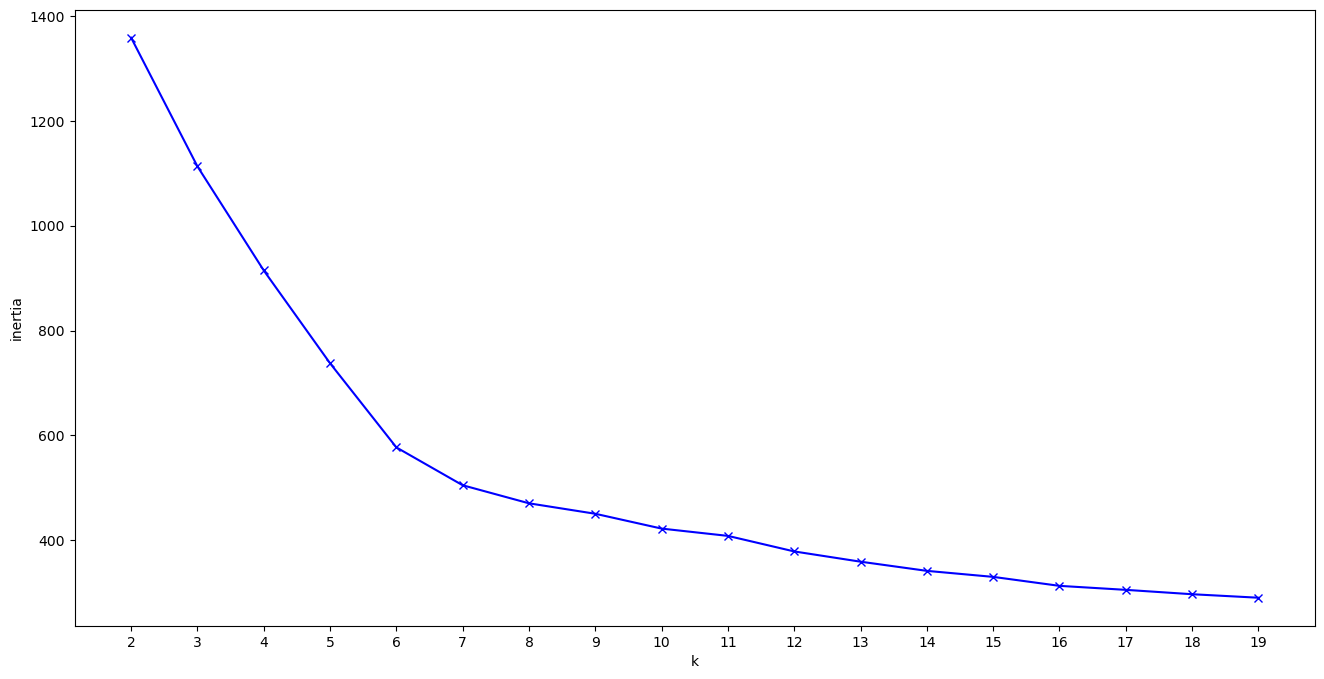

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Usuario\Desktop\Coses bootcamp\Classes\PROJECTS\The LAST DANCE\functions.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster_Kmeans'] = cluster


Cluster_Kmeans
0    165
1     93
Name: count, dtype: int64

In [9]:
KNN(data_por_cat['Aceite y salsas'])

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

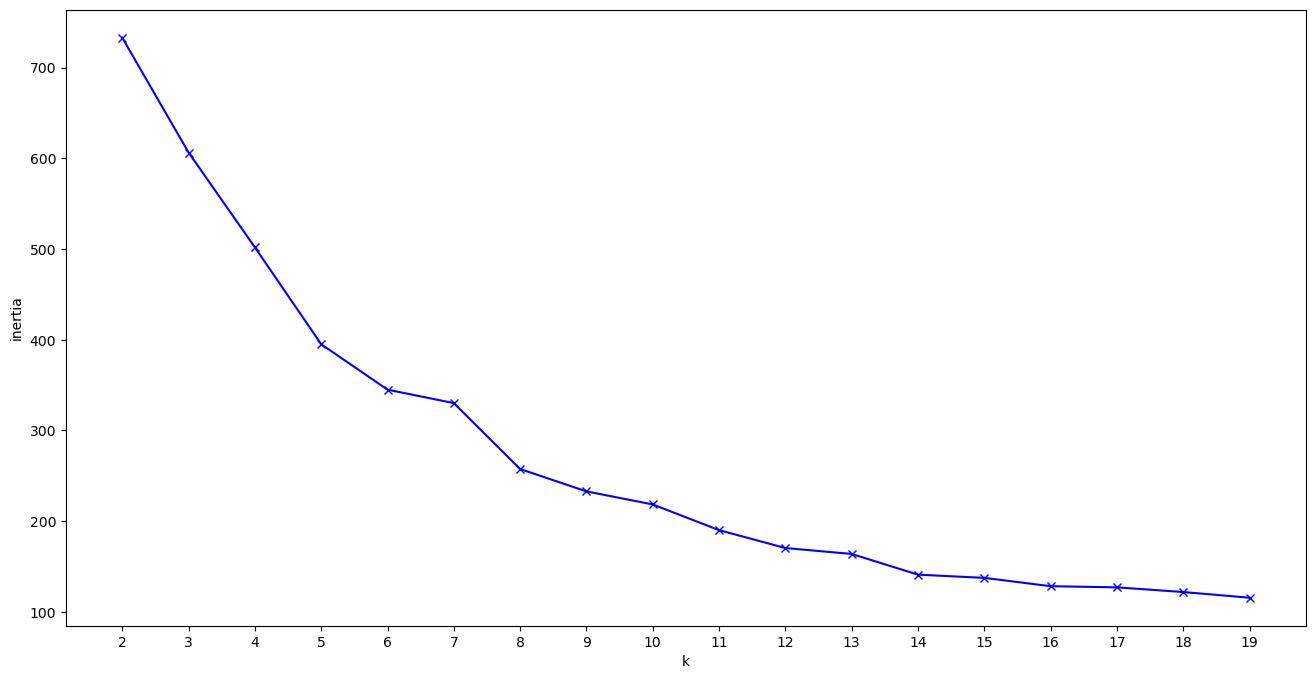

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Usuario\Desktop\Coses bootcamp\Classes\PROJECTS\The LAST DANCE\functions.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster_Kmeans'] = cluster


Cluster_Kmeans
1    62
2    43
0    30
4    22
3    14
Name: count, dtype: int64

In [10]:
KNN(data_por_cat['Bebidas'])

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

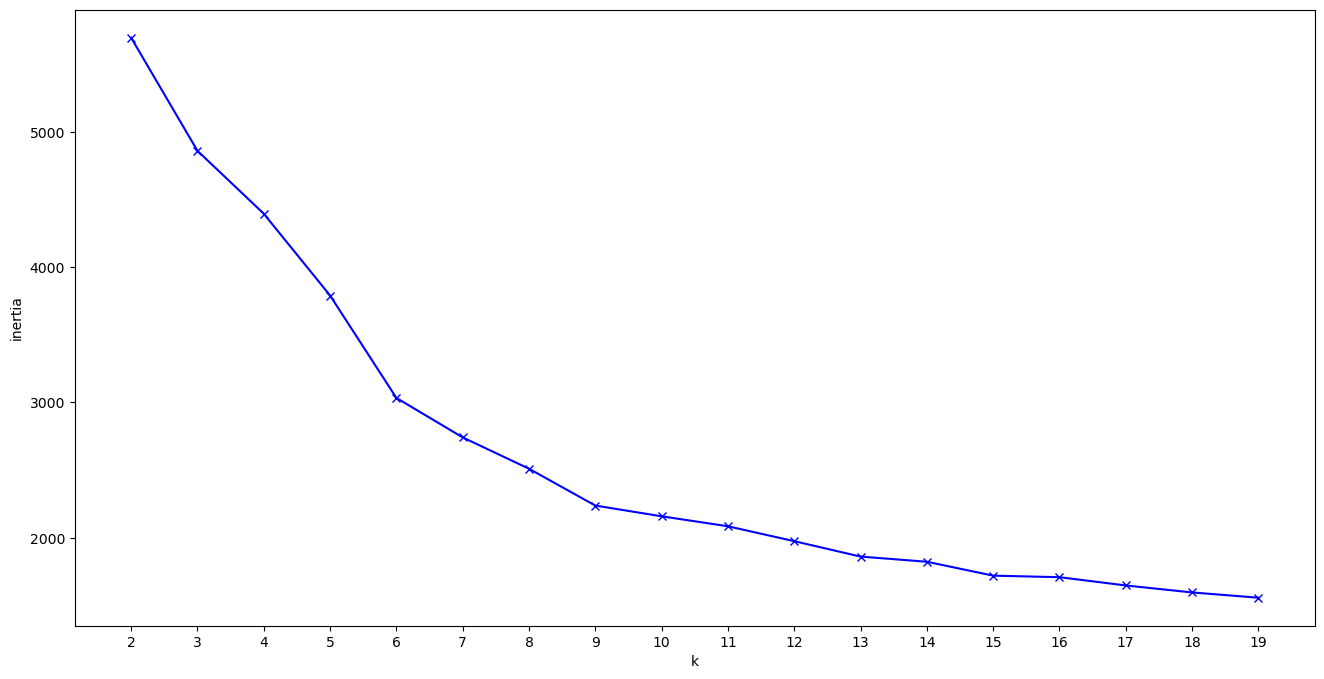

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Usuario\Desktop\Coses bootcamp\Classes\PROJECTS\The LAST DANCE\functions.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster_Kmeans'] = cluster


Cluster_Kmeans
2    527
1    482
0    224
Name: count, dtype: int64

In [11]:
KNN(data_por_cat['Fruta y verdura'])

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

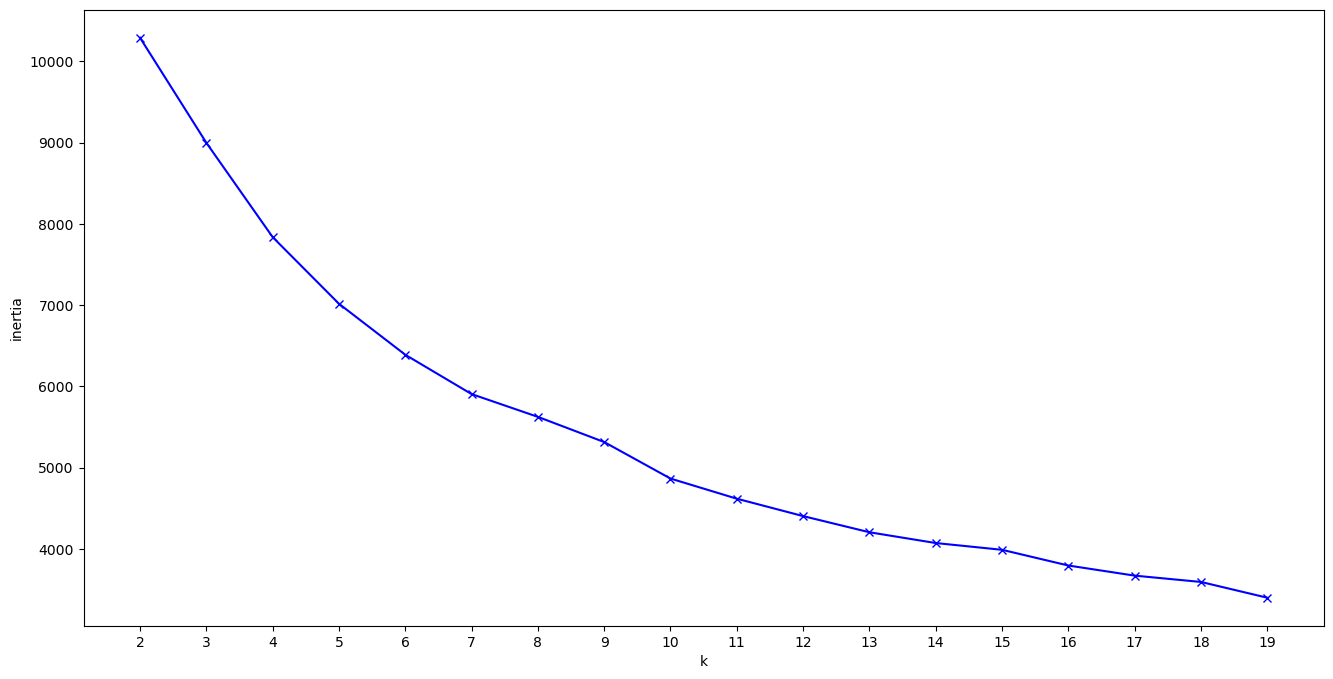

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Usuario\Desktop\Coses bootcamp\Classes\PROJECTS\The LAST DANCE\functions.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster_Kmeans'] = cluster


Cluster_Kmeans
0    635
1    634
2    407
3    396
Name: count, dtype: int64

In [12]:
KNN(data_por_cat['Procesados'])

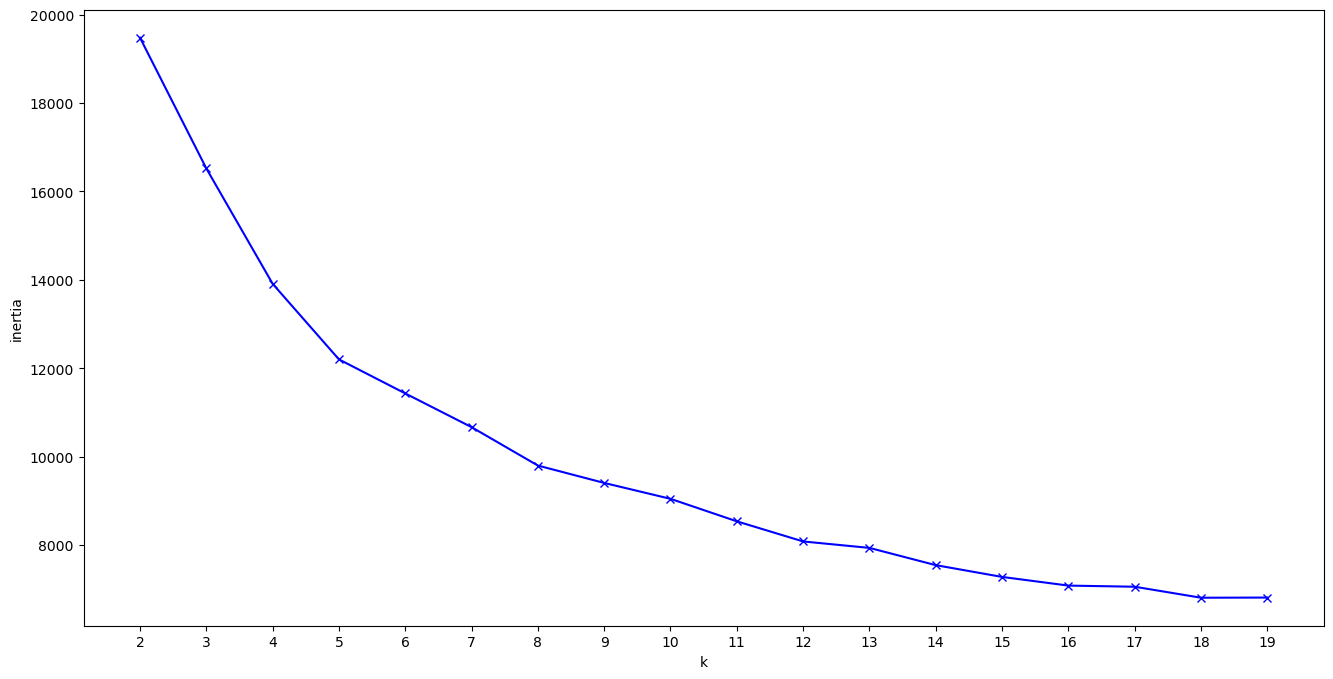

c:\Users\Usuario\Desktop\Coses bootcamp\Classes\PROJECTS\The LAST DANCE\functions.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster_Kmeans'] = cluster


Cluster_Kmeans
3    1547
1    1094
0     607
2     516
Name: count, dtype: int64

In [14]:
KNN(data_por_cat['Derivados de animales y sustitutivos'])

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

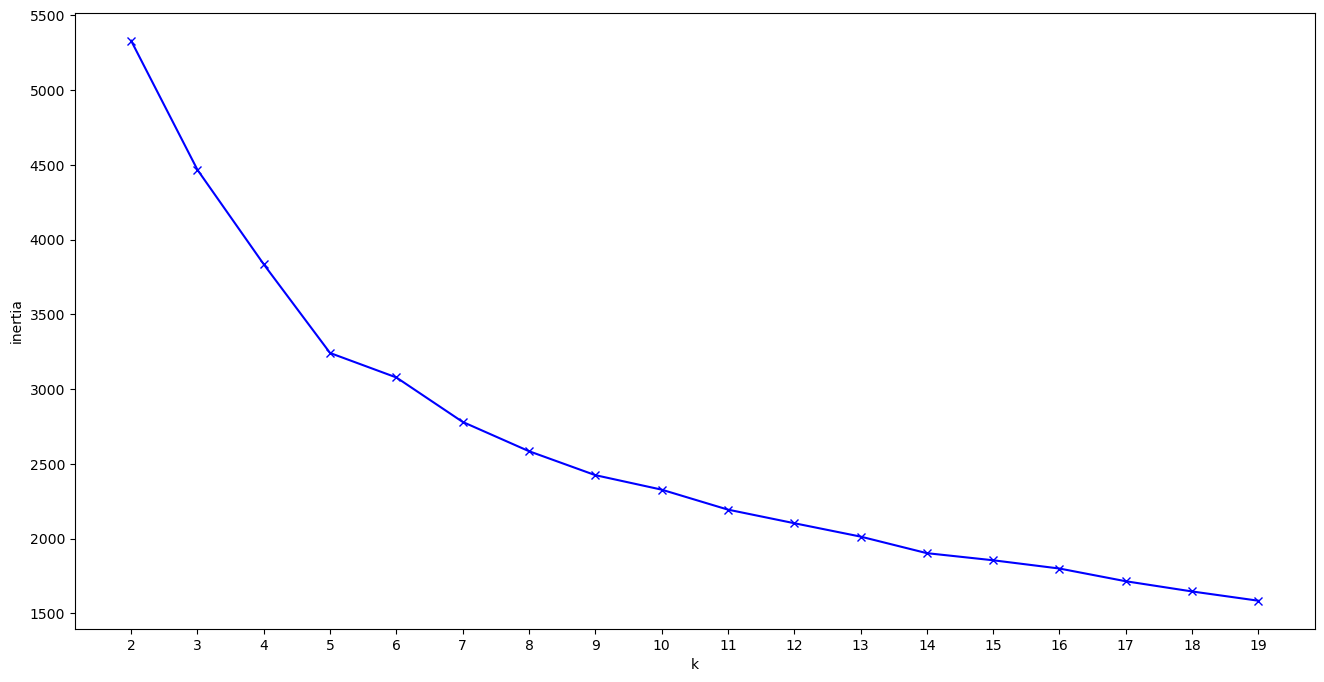

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Usuario\Desktop\Coses bootcamp\Classes\PROJECTS\The LAST DANCE\functions.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster_Kmeans'] = cluster


Cluster_Kmeans
3    445
2    369
1    190
0    150
4    109
Name: count, dtype: int64

In [15]:
KNN(data_por_cat['Legumbres, arroz y cerales'])

In [20]:
data_por_cat

{'Fruta y verdura':                                                Producto        Kcal  \
 0                                               Plátano   97.692308   
 4                                              Aguacate  160.000000   
 8                                        Fresa o Freson   32.000000   
 14                          Crema de Cacahuetes Cremosa  618.000000   
 15                                          Tomate Pera   20.000000   
 ...                                                 ...         ...   
 8747                                      Trio con Kale   30.000000   
 8748                            Mini Chapatas con Pasas  340.000000   
 8750                           Gazpacho con Tomate Rosa   93.000000   
 8751  Smoothie Mix Zanahoria, Manzana, Melocotón, Pi...   44.000000   
 8758                                  Arroz de Brócoli    34.000000   
 
           Grasa  Saturada%  Carbohidratos  Azucares%  Proteina       Sal  \
 0      0.300000   0.000000      22.80

In [28]:
data_por_cat['Aceite y salsas']

,Producto,Kcal,Grasa,Saturada%,Carbohidratos,Azucares%,Proteina,Sal,Supermercado,Categoria,Cluster_Kmeans
7,Atún en Aceite de Oliva,245.000000,18.000000,16.111111,0.9,55.555556,21.000000,0.000000,mercadona,Aceite y salsas,1
9,Aceite de Oliva Virgen Extra,822.000000,91.000000,14.285714,0.0,0.000000,0.000000,0.000000,mercadona,Aceite y salsas,1
19,Tomate Frito,77.000000,3.500000,8.571429,9.5,72.631579,1.500000,1.000000,mercadona,Aceite y salsas,0
41,Atún Claro en Aceite de Girasol,203.571429,11.964286,11.940299,0.0,0.000000,23.928571,1.339286,mercadona,Aceite y salsas,1
90,Pepinillos en Vinagre,15.000000,0.500000,20.000000,2.2,22.727273,0.900000,1.700000,mercadona,Aceite y salsas,0
...,...,...,...,...,...,...,...,...,...,...,...
8584,Salsa Cesar,162.000000,9.700000,28.865979,9.5,30.526316,8.200000,1.000000,lidl,Aceite y salsas,0
8624,Panini Pesto,204.000000,6.300000,0.000000,28.9,0.000000,7.100000,0.000000,lidl,Aceite y salsas,0
8632,Tomate Frito Ajo Negro y Hierbas Mediterráneas,80.000000,4.300000,16.279070,8.0,77.500000,1.400000,1.000000,lidl,Aceite y salsas,0
8656,Salsa Chimichurri Alma Latina,248.000000,21.300000,15.492958,12.3,80.487805,1.100000,4.230000,lidl,Aceite y salsas,0


In [23]:
data_clust = pd.concat(data_por_cat.values(), ignore_index=True)

In [25]:
data_clust.drop(columns='Unnamed: 0', inplace = True)

In [26]:
data_clust

,Producto,Kcal,Grasa,Saturada%,Carbohidratos,Azucares%,Proteina,Sal,Supermercado,Categoria,Cluster_Kmeans
0,Macarrones,361.0,1.5,26.666667,72.0,4.861111,13.0,0.01,mercadona,"Legumbres, arroz y cerales",2
1,Garbanzos Cocidos,90.0,2.2,22.727273,9.5,7.368421,5.5,2.00,mercadona,"Legumbres, arroz y cerales",2
2,Lentejas Cocidas,89.0,0.4,25.000000,10.7,4.672897,8.2,0.80,mercadona,"Legumbres, arroz y cerales",2
3,Arroz Blanco,345.0,0.7,28.571429,77.0,0.649351,7.2,0.00,mercadona,"Legumbres, arroz y cerales",2
4,Almendra Natural,603.0,50.9,7.662083,5.4,100.000000,25.3,0.00,mercadona,"Legumbres, arroz y cerales",0
...,...,...,...,...,...,...,...,...,...,...,...
8756,Café Frio,59.0,1.2,66.666667,9.0,100.000000,3.0,0.00,lidl,Bebidas,0
8757,Salteado Mexicano,86.0,4.1,58.536585,8.1,43.209877,2.5,0.00,lidl,Bebidas,0
8758,Shandy,32.0,0.5,100.000000,7.0,95.714286,0.5,0.02,lidl,Bebidas,0
8759,Alte Excellenz,454.0,18.4,59.239130,58.7,84.838160,2.7,0.02,lidl,Bebidas,4


In [27]:
data_clust.to_csv('Dataset/Data.csv',index=False)

In [82]:
'''def prediction(data):
    import pandas as pd
    from sklearn.metrics import pairwise_distances

    #Preguntamos al usuario qué producto quiere seleccionar
    producto = input('Dime un producto: ')
    masca = data['Producto'] == producto
    try:
        cat = data[masca]['Categoria'].values[0]
    except:
        return 'No entendí el producto'


    #Si el producto está duplicado en el Dataframe por estar en varios supermercados:
    macarrones = data[masca]
    if len(macarrones)>1:
        print(macarrones['Supermercado'].unique())
        
        supermercado = input('Selecciona el supermercado del producto comentado:')
         
        mascarilla = (data['Producto'] == producto) & (data['Supermercado'] == supermercado) & (data['Categoria'] == cat)
    
    #No encontramos producto
    elif len(macarrones) == 0:
        return 'no producto found'
    #Si el producto no tiene dupplicados
    else:
        mascarilla = (data['Producto'] == producto) & (data['Categoria'] == cat)
    
    fila = data[mascarilla]
    cluster_producto = fila['Cluster_Kmeans'].values[0]
    cat = fila['Categoria'].values[0]

    #Filtramos para quitar el producto del que usuario (también quitamos el mismo producto de otro super, ya de paso seleccionamos el mismo cluster)
    filtrado = data[(data['Cluster_Kmeans'] == cluster_producto) & (data['Producto'] != producto) & (data['Categoria'] == cat)]

    #elminamos las columnas no numércias.
    filtrado_values = filtrado.drop(columns=['Producto', 'Supermercado', 'Cluster_Kmeans','Categoria']).values
    fila_values = fila.drop(columns=['Producto', 'Supermercado', 'Cluster_Kmeans','Categoria']).values

    #Distancias:
    distances = pairwise_distances(fila_values, filtrado_values).flatten()
    ranking = filtrado.copy()
    ranking['Distancia'] = distances

    ranking10 = ranking.sort_values(by='Distancia').head(10)
    print('Productos más similares:')
    return ranking10'''

# Function

In [50]:
def Predict(macro = 'no'):
    import requests
    import pandas as pd
    import re
    import numpy as np
    #import time
    #import seaborn as sns
    #import matplotlib.pyplot as plt
    #from sklearn.cluster import KMeans
    from sklearn.metrics import pairwise_distances_argmin_min
    from sklearn.metrics import pairwise_distances
    from sklearn.preprocessing import StandardScaler
    #from sklearn.neighbors import NearestNeighbors 
    from sklearn.mixture import GaussianMixture
    from fuzzywuzzy import process

    '''Importar data con clúster por producto'''
    data = pd.read_csv('Dataset/Data.csv') #CAMBIAR POR EL DATASET REAL.
    data = data.reindex(columns=['Producto','Kcal','Proteina','Grasa','Saturada%','Carbohidratos','Azucares%','Sal','Supermercado','Cluster_Kmeans','Categoria'])
    
    producto = input(f'Qué producto quieres ver?')
    modelo = input(f'Escoje entre productos de la misma categoria (C) o productos nutricionalmente similares (N):')
    fila_producto = data['Producto'] == producto
    macarrones  = data[fila_producto]
    lista_productos = data['Producto'].tolist()
    #Significa que el producto está en más de un supermercado
    while len(macarrones) == 0:
        print('No encontré el producto, quizás te referías a alguno de estos:')
        coincidencias = process.extract(producto, lista_productos, limit=6)
        coincidencias = [item[0] for item in coincidencias if item[1] >= 60]
        print(coincidencias)
        producto = input('A qué producto de la lista te refieres?')
        fila_producto = data['Producto'] == producto
        macarrones  = data[fila_producto]
        
    if len(macarrones) >1:
        print(macarrones['Supermercado'].unique())
        supermercado = input('Selecciona el supermercado del producto comentado:')
        mascarilla = (data['Producto'] == producto) & (data['Supermercado'] == supermercado)
        
    elif len(macarrones) == 1:
        mascarilla = data['Producto'] == producto
        

    '''Productos de la misma categoria, usamos el clúster ya hecho en la base de datos'''
    if modelo == 'C':
        fila = data[mascarilla]
        cluster_producto = fila['Cluster_Kmeans'].values[0]
        cat = fila['Categoria'].values[0]
        
        filtrado = data[(data['Cluster_Kmeans'] == cluster_producto) & (data['Producto'] != producto) & (data['Categoria'] == cat)]
        filtrado_values = filtrado.drop(columns=['Producto', 'Supermercado', 'Cluster_Kmeans','Categoria']).values
        fila_values = fila.drop(columns=['Producto', 'Supermercado', 'Cluster_Kmeans','Categoria']).values

        distances = pairwise_distances(fila_values, filtrado_values).flatten()
        ranking = filtrado.copy()
        ranking['Distancia'] = distances
    
        ranking10 = ranking.sort_values(by='Distancia').head(10)
        print(f"""Tu producto ({producto}) tiene: \n{fila['Kcal'].values[0]} Kcal 
              \n {fila['Proteina'].values[0]} Proteína
              \n {fila['Grasa'].values[0]} Grasa (de las cuales saturadas {fila['Saturada%'].values[0]})
              \n {fila['Carbohidratos'].values[0]} Carbohidratos (de los cuales azúcares {fila['Azucares%'].values[0]})
              \n {fila['Sal'].values[0]} Sal""")
        
        print('Productos más similares:')
        return ranking10.drop(columns = ['Categoria','Cluster_Kmeans','Distancia'])
        # Falta ordenar por macronutriente
    elif modelo == 'N':
        X = data.drop(['Producto', 'Supermercado','Categoria','Sal','Kcal','Cluster_Kmeans'], axis = 1)
        min_samples = 2 * len( X.columns )
        k = min_samples

        scaler = StandardScaler()
        scaler.fit(X)

        X_scaled = scaler.transform(X)

        X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns )
        model = GaussianMixture(n_components = k ) 
        model.fit( X_scaled_df )
        clusters = model.predict( X_scaled_df )
        data['Cluster_GMM'] = clusters

        fila = data[mascarilla]
        cluster_producto = fila['Cluster_GMM'].values[0]
        #cat = fila['Categoria'].values[0]
        
        filtrado = data[(data['Cluster_GMM'] == cluster_producto) & (data['Producto'] != producto)]
        filtrado_values = filtrado.drop(columns=['Producto', 'Supermercado', 'Cluster_Kmeans','Categoria','Cluster_GMM']).values
        fila_values = fila.drop(columns=['Producto', 'Supermercado', 'Cluster_Kmeans','Categoria','Cluster_GMM']).values

        distances = pairwise_distances(fila_values, filtrado_values).flatten()
        ranking = filtrado.copy()
        ranking['Distancia'] = distances
    
        ranking10 = ranking.sort_values(by='Distancia').head(10)
        print(f"""Tu producto ({producto}) tiene: \n{fila['Kcal'].values[0]} Kcal 
              \n {fila['Proteina'].values[0]} Proteína
              \n {fila['Grasa'].values[0]} Grasa (de las cuales saturadas {fila['Saturada%'].values[0]})
              \n {fila['Carbohidratos'].values[0]} Carbohidratos (de los cuales azúcares {fila['Azucares%'].values[0]})
              \n {fila['Sal'].values[0]} Sal""")
        print('Productos más similares:')
        return ranking10.drop(columns = ['Categoria','Cluster_GMM','Distancia'])
    else:
        return cagaste
        

In [52]:
Predict()

Tu producto (Pan) tiene: 
267.0 Kcal 
              
 8.6 Proteína
              
 1.0 Grasa (de las cuales saturadas 20.0)
              
 55.00000000000001 Carbohidratos (de los cuales azúcares 4.181818181818181)
              
 1.5 Sal
Productos más similares:


,Producto,Kcal,Proteina,Grasa,Saturada%,Carbohidratos,Azucares%,Sal,Supermercado,Cluster_Kmeans
5206,Barra Pan,267.0,8.6,1.0,20.000000,55.0,4.909091,0.00,mercadona,0
91,Baguette,268.0,8.5,1.0,20.000000,55.0,4.181818,3.00,mercadona,2
5167,Barra Campesina,268.0,8.9,1.0,20.000000,54.3,4.604052,4.00,mercadona,0
561,Pa Rodó,267.0,9.7,1.7,17.647059,53.0,4.150943,3.25,mercadona,3
937,Chapata Gourmet,266.0,7.9,1.1,18.181818,54.0,1.111111,1.40,carrefour,3
438,Pan Txapata,268.0,7.9,1.1,18.181818,54.0,1.111111,1.30,mercadona,2
97,Pan Rustico,269.0,7.3,1.3,23.076923,56.0,4.107143,0.00,mercadona,2
640,Pan Bocata,264.0,8.2,1.1,18.181818,53.3,1.876173,1.25,carrefour,3
6284,Pan Bocadillo,263.0,8.6,1.4,21.428571,53.0,3.396226,1.36,carrefour,0
949,Pan Pannier,263.0,8.6,1.4,21.428571,53.0,3.396226,3.40,carrefour,3


In [30]:
#pip install fuzzywuzzy


  Obtaining dependency information for fuzzywuzzy from https://files.pythonhosted.org/packages/43/ff/74f23998ad2f93b945c0309f825be92e04e0348e062026998b5eefef4c33/fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [31]:
#pip install python-Levenshtein


  Obtaining dependency information for python-Levenshtein from https://files.pythonhosted.org/packages/72/8e/559c539e76bc0b1defec3da39a047fe151258efc9b215bf41db41e2c7922/python_Levenshtein-0.25.1-py3-none-any.whl.metadata
  Obtaining dependency information for Levenshtein==0.25.1 from https://files.pythonhosted.org/packages/47/19/4528246e25bb79fa8d4adae6640251c613f05eb310d79307d1ac53c7bf28/Levenshtein-0.25.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for rapidfuzz<4.0.0,>=3.8.0 from https://files.pythonhosted.org/packages/04/10/2c0ef45d4ace8dde87cfb91e48fb5c9976f8e01a57eb3230d90b82801dc5/rapidfuzz-3.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/98.4 kB ? eta -:--:--
   ------------------------------------- -- 92.2/98.4 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 98.4/98.4 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---- ------------------------